# Berke Lab Spike Sorting and Decoding 

In [1]:
import datajoint as dj
import numpy as np

import spyglass.common as sgc
import spyglass.spikesorting.v1 as sgs
import spyglass.position as sgp
from spyglass.common import Nwbfile
from spyglass.utils.nwb_helper_fn import get_nwb_file

# Make sure the session exists
#nwb_file_name = "IM-1594_20230726_.nwb"
nwb_file_name =  "IM-1478_20220726_.nwb"

# Fetch file create date and source version to make sure it's up to date
nwb_file_abspath = Nwbfile.get_abs_path(nwb_file_name)
nwbf = get_nwb_file(nwb_file_abspath)
print(f"File created on {nwbf.file_create_date[0].strftime('%m/%d/%Y %H:%M:%S')}")
print(f"Source script version {nwbf.source_script}")

[2025-11-10 13:40:18,038][INFO]: DataJoint 0.14.4 connected to scrater@lmf-db.cin.ucsf.edu:3306


File created on 10/29/2025 18:00:06
Source script version jdb_to_nwb 2.1.2.dev2+g12a9b6eed.d20251030


Take a quick look at the parameters we are using!

In [2]:
from spyglass.spikesorting.analysis.v1.group import UnitSelectionParams
from spyglass.decoding.v1.core import DecodingParameters

# Preprocessing
preproc_param_name = "franklab_tetrode_hippocampus"
artifact_param_name = "ampl_1000_z_30_prop_075_1ms"
# Sorting
sorter = "mountainsort4"
sorter_param_name = "franklab_tetrode_hippocampus_30KHz"
# Curation
waveform_param_name = "default_not_whitened"
metric_param_name = "franklab_default"
metric_curation_param_name = "default"
# Decoding
unit_filter_params_name = "default_exclusion"
decoding_param_name = "contfrag_sorted"
# Position (for decoding)
trodes_pos_params_name = "berke_double_led_500"

# Optionally print them all!
review_params = True
if review_params:
    # Preprocessing
    display((sgs.SpikeSortingPreprocessingParameters() & {"preproc_param_name": preproc_param_name}).fetch1())
    display((sgs.ArtifactDetectionParameters() & {"artifact_param_name": artifact_param_name}).fetch1("artifact_params"))
    # Sorting
    display((sgs.SpikeSorterParameters() & {"sorter": sorter, "sorter_param_name": sorter_param_name}).fetch1())
    # Curation
    display((sgs.WaveformParameters() & {"waveform_param_name": waveform_param_name}).fetch1())
    display((sgs.MetricParameters() & {"metric_param_name": metric_param_name}).fetch1())
    display((sgs.MetricCurationParameters() & {"metric_curation_param_name": metric_curation_param_name}).fetch1())
    # Decoding
    display((UnitSelectionParams() & {"unit_filter_params_name": unit_filter_params_name}).fetch1())
    display((DecodingParameters() & {"decoding_param_name" : decoding_param_name}).fetch("decoding_params"))
    # Position (for decoding)
    display((sgp.v1.TrodesPosParams() & {"trodes_pos_params_name": trodes_pos_params_name}).fetch1("params"))


{'preproc_param_name': 'franklab_tetrode_hippocampus',
 'preproc_params': {'frequency_min': 600,
  'frequency_max': 6000,
  'margin_ms': 5,
  'seed': 0,
  'min_segment_length': 0.0015}}

{'zscore_thresh': 30,
 'amplitude_thresh_uV': 1000,
 'proportion_above_thresh': 0.75,
 'removal_window_ms': 1,
 'chunk_duration': '10s',
 'n_jobs': 4,
 'progress_bar': 'True'}

{'sorter': 'mountainsort4',
 'sorter_param_name': 'franklab_tetrode_hippocampus_30KHz',
 'sorter_params': {'detect_sign': -1,
  'adjacency_radius': 100,
  'freq_min': 600,
  'freq_max': 6000,
  'filter': False,
  'whiten': True,
  'num_workers': 1,
  'clip_size': 40,
  'detect_threshold': 3,
  'detect_interval': 10}}

{'waveform_param_name': 'default_not_whitened',
 'waveform_params': {'ms_before': 0.5,
  'ms_after': 0.5,
  'max_spikes_per_unit': 5000,
  'n_jobs': 5,
  'total_memory': '5G',
  'whiten': False}}

{'metric_param_name': 'franklab_default',
 'metric_params': {'snr': {'peak_sign': 'neg',
   'random_chunk_kwargs_dict': {'num_chunks_per_segment': 20,
    'chunk_size': 10000,
    'seed': 0}},
  'isi_violation': {'isi_threshold_ms': 1.5, 'min_isi_ms': 0.0},
  'nn_isolation': {'max_spikes': 1000,
   'min_spikes': 10,
   'n_neighbors': 5,
   'n_components': 7,
   'radius_um': 100,
   'seed': 0},
  'nn_noise_overlap': {'max_spikes': 1000,
   'min_spikes': 10,
   'n_neighbors': 5,
   'n_components': 7,
   'radius_um': 100,
   'seed': 0},
  'peak_channel': {'peak_sign': 'neg'},
  'num_spikes': {}}}

{'metric_curation_param_name': 'default',
 'label_params': {'nn_noise_overlap': ['>', 0.1, ['noise', 'reject']]},
 'merge_params': {}}

{'unit_filter_params_name': 'default_exclusion',
 'include_labels': [],
 'exclude_labels': ['noise', 'mua']}

[{'discrete_initial_conditions': array([0.5, 0.5]),
  'continuous_initial_conditions_types': [UniformInitialConditions(),
   UniformInitialConditions()],
  'discrete_transition_concentration': 1.0,
  'discrete_transition_stickiness': array([0., 0.]),
  'discrete_transition_regularization': 1e-10,
  'discrete_transition_type': DiscreteStationaryDiagonal(diagonal_values=array([0.98, 0.98])),
  'continuous_transition_types': [[RandomWalk(environment_name='', movement_var=6.0, movement_mean=0.0, use_manifold_distance=False, direction=None),
    Uniform(environment_name='', environment2_name=None)],
   [Uniform(environment_name='', environment2_name=None),
    Uniform(environment_name='', environment2_name=None)]],
  'environments': [Environment(environment_name='', place_bin_size=2.0, track_graph=None, edge_order=None, edge_spacing=None, is_track_interior=None, position_range=None, infer_track_interior=True, fill_holes=False, dilate=False, bin_count_threshold=0)],
  'infer_track_interior':

{'max_LED_separation': 9.0,
 'max_plausible_speed': 300.0,
 'position_smoothing_duration': 0.125,
 'speed_smoothing_std_dev': 0.1,
 'orient_smoothing_std_dev': 0.001,
 'led1_is_front': 0,
 'is_upsampled': 1,
 'upsampling_sampling_rate': 500,
 'upsampling_interpolation_method': 'linear'}

# First check out all existing entries for this nwb

Helpful if we're halfway through running this.

In [3]:
from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput
from spyglass.spikesorting.analysis.v1.group import SortedSpikesGroup
from spyglass.position import PositionOutput

# Find all entries for this nwb in PositionOutput
print(f"Entries for {nwb_file_name} in PositionOutput.TrodesPosV1")
display(PositionOutput.TrodesPosV1 & {"nwb_file_name": nwb_file_name})

# Find all entries for this nwb in SortGroup
print(f"Entries for {nwb_file_name} in sgs.SortGroup")
display((sgs.SortGroup & {"nwb_file_name": nwb_file_name}))

# Find all entries for this nwb in SpikeSortingRecordingSelection
print(f"Entries for {nwb_file_name} in sgs.SpikeSortingRecordingSelection (one per SortGroup, or more if we are trying multiple preprocessing params)")
display(sgs.SpikeSortingRecordingSelection() & {'nwb_file_name': nwb_file_name})

# Fetch the recording ids (there is one for each sort group)
recording_ids = (sgs.SpikeSortingRecordingSelection() & {'nwb_file_name': nwb_file_name}).fetch("KEY")

# Use the recording_ids to get the preprocessed recording for each
print(f"Entries for {nwb_file_name} in sgs.SpikeSortingRecording (one per SortGroup)")
display(sgs.SpikeSortingRecording() & recording_ids)

# Get the detected artifact times for this recording
print(f"Entries for {nwb_file_name} in sgs.ArtifactDetectionSelection (one per recording_id)")
display(sgs.ArtifactDetectionSelection() & recording_ids)
artifact_ids = (sgs.ArtifactDetectionSelection() & recording_ids).fetch("KEY")

print(f"Entries for {nwb_file_name} in sgs.ArtifactDetection (one per recording_id)")
display(sgs.ArtifactDetection() & artifact_ids)

print(f"Entries for {nwb_file_name} in sgs.SpikeSortingSelection")
display(sgs.SpikeSortingSelection() & {'nwb_file_name': nwb_file_name})
sorting_ids = (sgs.SpikeSortingSelection() & {'nwb_file_name': nwb_file_name}).fetch("KEY")

print(f"Entries for {nwb_file_name} in sgs.SpikeSorting")
display(sgs.SpikeSorting() & sorting_ids)

print(f"Entries for {nwb_file_name} in sgs.CurationV1")
display(sgs.CurationV1() & sorting_ids)

print(f"Entries for {nwb_file_name} in sgs.MetricCurationSelection")
display(sgs.MetricCurationSelection() & sorting_ids)

print(f"Entries for {nwb_file_name} in sgs.SpikeSortingOutput")
merge_ids = SpikeSortingOutput().get_restricted_merge_ids(key={"nwb_file_name": nwb_file_name}, as_dict=True)
display(SpikeSortingOutput & merge_ids)

print(f"Entries for {nwb_file_name} in SortedSpikesGroup")
display(SortedSpikesGroup & {"nwb_file_name": nwb_file_name})

Entries for IM-1478_20220726_.nwb in PositionOutput.TrodesPosV1


merge_id,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,trodes_pos_params_name name for this set of parameters
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,pos 0 valid times,berke_double_led_500
d99e7241-3d87-5b76-43e8-ca971ffc9100,IM-1478_20220726_.nwb,pos 0 valid times,berke_double_led


Entries for IM-1478_20220726_.nwb in sgs.SortGroup


nwb_file_name name of the NWB file,sort_group_id,sort_reference_electrode_id the electrode to use for referencing
IM-1478_20220726_.nwb,0,-1
IM-1478_20220726_.nwb,1,-1
IM-1478_20220726_.nwb,2,-1
IM-1478_20220726_.nwb,3,-1
IM-1478_20220726_.nwb,4,-1
IM-1478_20220726_.nwb,5,-1
IM-1478_20220726_.nwb,6,-1
IM-1478_20220726_.nwb,7,-1
IM-1478_20220726_.nwb,8,-1
IM-1478_20220726_.nwb,9,-1


Entries for IM-1478_20220726_.nwb in sgs.SpikeSortingRecordingSelection (one per SortGroup, or more if we are trying multiple preprocessing params)


recording_id,nwb_file_name name of the NWB file,sort_group_id,interval_list_name descriptive name of this interval list,preproc_param_name,team_name
0262eaeb-75c2-4285-9df2-b980b73da491,IM-1478_20220726_.nwb,48,00_r1,default,Berke Lab and friends
03524c38-9984-4d34-a7cd-f2d709ec56d6,IM-1478_20220726_.nwb,20,00_r1,default,Berke Lab and friends
06498a5e-5fc1-4d4c-914c-08ce27948b25,IM-1478_20220726_.nwb,41,00_r1,default,Berke Lab and friends
0867803c-2e78-4ac6-b4e2-6b085ca255ed,IM-1478_20220726_.nwb,4,00_r1,franklab_tetrode_hippocampus,Berke lab and friends
0970abac-28bb-4eff-b5db-6e56a35bd938,IM-1478_20220726_.nwb,57,00_r1,default,Berke Lab and friends
0d2e1d88-a0a1-4b08-8108-1003a19914e9,IM-1478_20220726_.nwb,7,00_r1,franklab_tetrode_hippocampus,Berke lab and friends
12616d5f-7f61-4f6a-95fe-b5c9fa1e1f6d,IM-1478_20220726_.nwb,47,00_r1,default,Berke Lab and friends
13b47c72-6b7d-462c-a0dc-24c3cf1f5ce9,IM-1478_20220726_.nwb,18,00_r1,default,Berke Lab and friends
179d1670-5dc9-4e8e-993c-22c3357da294,IM-1478_20220726_.nwb,2,00_r1,default,Berke Lab and friends
1aeaefa8-1f5e-4ec7-b603-4f0d62d4325b,IM-1478_20220726_.nwb,0,00_r1,default,Berke Lab and friends


Entries for IM-1478_20220726_.nwb in sgs.SpikeSortingRecording (one per SortGroup)


recording_id,analysis_file_name name of the file,object_id Object ID for the processed recording in NWB file,electrodes_id Object ID for the processed electrodes,hash Hash of the NWB file
0262eaeb-75c2-4285-9df2-b980b73da491,IM-1478_20220726_SYTKTQQQ0G.nwb,5864d581-5a65-4f05-a827-f54f391b57c3,1a2350e5-8154-4b72-a49e-3e26d61d3ee0,9076c48f7714a7ea4fda944ff7b0dbd8
03524c38-9984-4d34-a7cd-f2d709ec56d6,IM-1478_20220726_0QDD4YH0IL.nwb,24d7b2db-0d98-494b-9bb1-27ee37bcf1d1,dc7ea9d3-b10f-4adf-b76d-e9367d7c7535,139f79fe1968d93276a45aad4c374c46
06498a5e-5fc1-4d4c-914c-08ce27948b25,IM-1478_20220726_HNC4MIUKT8.nwb,c8e0d9aa-682d-4155-9f04-5f545329871d,0a662f50-08e2-433f-8f27-2ad2d9577b4a,fa38eb2d6e20594f288e05cf094b9e16
0867803c-2e78-4ac6-b4e2-6b085ca255ed,IM-1478_20220726_7JRFV48Z1Z.nwb,7631af76-aee5-43d2-bb17-6ad0de9c3589,1216005c-303d-413c-b83c-048becc338f3,3dba08fb6fc6720ac5fd168411b72eb0
0970abac-28bb-4eff-b5db-6e56a35bd938,IM-1478_20220726_VLB1AUK6JJ.nwb,f526131c-f329-4593-9732-68470e98b4a2,5b97d0d0-460d-4a98-ae05-3e14827db154,c39490b71944ebc47fba9eb47ee48777
0d2e1d88-a0a1-4b08-8108-1003a19914e9,IM-1478_20220726_0TRJO6BVLG.nwb,4992e6c3-dce4-477a-8bc0-51d2983f226e,ee32fb44-9374-409b-8a32-d0b9d44fc075,d60ed0f27b170309ce11c1996636d726
12616d5f-7f61-4f6a-95fe-b5c9fa1e1f6d,IM-1478_20220726_32HUVWPPA9.nwb,3ee2a60e-1851-44a8-a485-0ca67897cbe4,5b9f6938-b486-4d63-8959-cf591a5be91f,27d2d4a5248375e248ff4115ee7242ee
13b47c72-6b7d-462c-a0dc-24c3cf1f5ce9,IM-1478_20220726_9NO5PZ65I9.nwb,ad746bc2-0e43-4d28-8496-74db10666afc,9acbbc97-0b69-4617-8f94-c2f8468bee27,acbb769313606a1a3010ede451e987a3
179d1670-5dc9-4e8e-993c-22c3357da294,IM-1478_20220726_2KH5DZP3VT.nwb,24e63f06-9f0d-4da7-b837-09657dc751f1,5d85a1ce-c677-4c74-8905-be1cfccbb41a,f282a53b3350435f96cfc61e405939a9
1aeaefa8-1f5e-4ec7-b603-4f0d62d4325b,IM-1478_20220726_3TH04NXN8Z.nwb,a93ab18c-a08c-4ade-bb64-97248b422a53,6ab95136-8872-4f83-9cb7-1666990844af,92f1f6e7695277f66af5c0f1fc7e6299


Entries for IM-1478_20220726_.nwb in sgs.ArtifactDetectionSelection (one per recording_id)


artifact_id,recording_id,artifact_param_name
00748c2e-5496-464b-a568-6881ad3dce4b,a3f9cd29-b832-458c-95ac-52f6b610b771,ampl_1000_z_30_prop_075_1ms
03f56b0e-879f-4680-8a58-b8d43783c8ba,e181075d-24b2-4833-996a-d5ae1fbf4dfd,ampl_1000_z_30_prop_075_1ms
06ca392c-52ea-4440-acc4-2d8f0e7da063,91f091b1-1455-4c36-90b3-24d2c285ee1d,ampl_1000_z_30_prop_075_1ms
0e0989a7-6011-4282-ba07-da3bcdf78b23,a548e0b1-e094-4366-8864-ff3f9aef74a2,ampl_1000_z_30_prop_075_1ms
0e848e3d-74d1-4228-bc58-23693b42a787,7d5ff076-1bbe-4118-8e92-26479f61cb69,ampl_1000_z_30_prop_075_1ms
0f1e2905-ba23-4402-a7c3-acfc940a7f8a,b8c483f1-cd1c-44fe-be26-3827c7da962a,ampl_1000_z_30_prop_075_1ms
111591fc-254a-4468-bc1e-1083876ee5a3,8cf1d7e8-a500-48d4-a016-9a20a7a8c931,ampl_1000_z_30_prop_075_1ms
12d29853-d356-4fb2-b09f-613b8dd9cca7,8115e82e-2ece-44e6-97f1-5e68a2f5cb01,ampl_1000_z_30_prop_075_1ms
1cb9426e-66a1-49c0-83d5-62ac8fdc9f3c,0d2e1d88-a0a1-4b08-8108-1003a19914e9,ampl_1000_z_30_prop_075_1ms
1d8ed9a1-78ee-4430-a42b-2d2bd7a6f897,3fd516ce-6b0c-4168-8dca-56f6bc79e675,ampl_1000_z_30_prop_075_1ms


Entries for IM-1478_20220726_.nwb in sgs.ArtifactDetection (one per recording_id)


artifact_id
00748c2e-5496-464b-a568-6881ad3dce4b
03f56b0e-879f-4680-8a58-b8d43783c8ba
06ca392c-52ea-4440-acc4-2d8f0e7da063
0e0989a7-6011-4282-ba07-da3bcdf78b23
0e848e3d-74d1-4228-bc58-23693b42a787
0f1e2905-ba23-4402-a7c3-acfc940a7f8a
111591fc-254a-4468-bc1e-1083876ee5a3
12d29853-d356-4fb2-b09f-613b8dd9cca7
1cb9426e-66a1-49c0-83d5-62ac8fdc9f3c
1d8ed9a1-78ee-4430-a42b-2d2bd7a6f897


Entries for IM-1478_20220726_.nwb in sgs.SpikeSortingSelection


sorting_id,recording_id,sorter,sorter_param_name,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list
074df179-b833-4f50-a280-494fdd25dacd,91f091b1-1455-4c36-90b3-24d2c285ee1d,clusterless_thresholder,default_clusterless,IM-1478_20220726_.nwb,06ca392c-52ea-4440-acc4-2d8f0e7da063
08f4ec5c-ade9-4366-a06b-13ebc42f3527,6c4489be-6f98-49ee-a148-4cb23d14e94a,clusterless_thresholder,default_clusterless,IM-1478_20220726_.nwb,b19f4594-5cc8-4276-9096-caca59ce2bfb
16f40a2a-ec1c-46ed-bfd5-7dae64ebe1aa,7183f1d7-caa8-4e2c-b24c-427101d430dc,clusterless_thresholder,default_clusterless,IM-1478_20220726_.nwb,81446776-e618-4aef-85a4-44063e362c5c
182eb872-395f-4248-97be-d481f08c9154,dd2afb0c-83e3-4f57-9b0d-75d73d69f780,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,3ee24ae0-f601-45d9-9374-0972dd713d11
1ac655c1-00a9-4c6c-b760-4603f40638e9,29e3a753-354b-43c7-9e7c-dba010971b41,clusterless_thresholder,default_clusterless,IM-1478_20220726_.nwb,92d75369-5280-486e-ac65-8e743927ec23
1b0162ba-3bf7-49ec-be76-e166726475ed,3fd516ce-6b0c-4168-8dca-56f6bc79e675,clusterless_thresholder,default_clusterless,IM-1478_20220726_.nwb,1d8ed9a1-78ee-4430-a42b-2d2bd7a6f897
20fa485c-bdbb-456a-9e83-17a9bea8b2df,e2d0a59a-713e-4b24-a22e-5d8e63ae3463,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,e5eb99f0-0574-4c60-9933-e4e0869972b1
2b4c2e6b-204f-40fe-bedc-403c2c9134ba,bcc4a673-04de-49c8-838c-e391e615545d,clusterless_thresholder,default_clusterless,IM-1478_20220726_.nwb,a698cdc4-a100-4434-8836-847d756fcb23
2b6b384e-3b7a-444f-9cf4-7c00cb18a867,8cf1d7e8-a500-48d4-a016-9a20a7a8c931,clusterless_thresholder,default_clusterless,IM-1478_20220726_.nwb,111591fc-254a-4468-bc1e-1083876ee5a3
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,847eb270-89e4-472b-bd8d-15438dd8ffd4,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,9e90129a-7d22-4bd9-8023-ccfc2bdbb45b


Entries for IM-1478_20220726_.nwb in sgs.SpikeSorting


sorting_id,analysis_file_name name of the file,object_id Object ID for the sorting in NWB file,"time_of_sort in Unix time, to the nearest second"
074df179-b833-4f50-a280-494fdd25dacd,IM-1478_20220726_ZX0ZBR7VJR.nwb,4710ca2a-4a06-43c3-8d96-3918564f6b05,1762125756
08f4ec5c-ade9-4366-a06b-13ebc42f3527,IM-1478_20220726_JHJL1SAPTV.nwb,c76cba34-5ab2-4b99-b041-805cea4232ee,1762190615
16f40a2a-ec1c-46ed-bfd5-7dae64ebe1aa,IM-1478_20220726_VZAWGR4KKQ.nwb,d55f7c40-0705-4414-8fd4-195be3427094,1762128634
182eb872-395f-4248-97be-d481f08c9154,IM-1478_20220726_XTVSKAFMZD.nwb,9b48fe55-a9a2-49af-bf67-b6ac6d84e400,1762368782
1ac655c1-00a9-4c6c-b760-4603f40638e9,IM-1478_20220726_LAXVHOOHO2.nwb,f26c7158-d7c8-4b41-a64f-17766f71f144,1762126359
1b0162ba-3bf7-49ec-be76-e166726475ed,IM-1478_20220726_4OSZZNYH6Q.nwb,e6db2a9d-b159-419b-93de-ed3ac9f785dd,1762126822
20fa485c-bdbb-456a-9e83-17a9bea8b2df,IM-1478_20220726_6GXAOZUEEA.nwb,159c6b8c-fff6-4ee1-b13c-160491afceff,1762369236
2b4c2e6b-204f-40fe-bedc-403c2c9134ba,IM-1478_20220726_S1LTAQIVIK.nwb,6c976f02-1fed-49c9-bc96-fad65f8f8b65,1762128794
2b6b384e-3b7a-444f-9cf4-7c00cb18a867,IM-1478_20220726_DFCHIYYPSM.nwb,31cd6211-7668-45e9-801d-8dd5a6be457b,1762190691
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,IM-1478_20220726_XSRR71LU4H.nwb,455b158d-59ed-40f9-8f0d-7efa5b864e5a,1762369671


Entries for IM-1478_20220726_.nwb in sgs.CurationV1


sorting_id,curation_id,parent_curation_id,analysis_file_name name of the file,object_id,merges_applied,description
074df179-b833-4f50-a280-494fdd25dacd,0,-1,IM-1478_20220726_1BT75AFXQU.nwb,00a8bb00-da73-47b4-bf7d-538044310314,0,
08f4ec5c-ade9-4366-a06b-13ebc42f3527,0,-1,IM-1478_20220726_9YQMVY4RD0.nwb,8ebe4a08-b2fb-440b-8dab-5d362a4d0295,0,
16f40a2a-ec1c-46ed-bfd5-7dae64ebe1aa,0,-1,IM-1478_20220726_6KWF4HN10F.nwb,b361dfd1-0d16-4e72-8210-42438e063f1d,0,
182eb872-395f-4248-97be-d481f08c9154,0,-1,IM-1478_20220726_CAC88V34XP.nwb,36bbc865-b980-41b1-8003-23e3b3e25379,0,initial automatic curation
182eb872-395f-4248-97be-d481f08c9154,1,0,IM-1478_20220726_71D1S0VFBB.nwb,1a686739-cdee-4521-bca9-70913e0bf917,0,after metric curation
1ac655c1-00a9-4c6c-b760-4603f40638e9,0,-1,IM-1478_20220726_FLPZC3VWRT.nwb,eaf0a583-2e8e-4e5e-b286-14457eb7ac71,0,
1b0162ba-3bf7-49ec-be76-e166726475ed,0,-1,IM-1478_20220726_X9F0OU43Z0.nwb,51141f26-dd43-41ef-bdf3-63e2e6e22b33,0,
20fa485c-bdbb-456a-9e83-17a9bea8b2df,0,-1,IM-1478_20220726_2LQZTIRXZT.nwb,aadc3255-3b43-4dfe-afbf-7409479f90ad,0,initial automatic curation
20fa485c-bdbb-456a-9e83-17a9bea8b2df,1,0,IM-1478_20220726_DP739VRJ5T.nwb,c04edfdd-9f5d-4a35-add4-3a86ab39f8f8,0,after metric curation
2b4c2e6b-204f-40fe-bedc-403c2c9134ba,0,-1,IM-1478_20220726_QON8JV0B0F.nwb,f7540c4a-a441-4077-8dce-060ef32a9023,0,


Entries for IM-1478_20220726_.nwb in sgs.MetricCurationSelection


metric_curation_id,sorting_id,curation_id,waveform_param_name name of waveform extraction parameters,metric_param_name,metric_curation_param_name
0bc55909-59fd-405a-8a94-b41d94a27804,373f4eb7-9411-41bf-ad85-16bbaccb3dfa,0,default_not_whitened,franklab_default,default
0eaaadfd-5e07-45cd-9d46-238bca751b54,a28382e1-eb6d-4411-95e3-c8c7a6fe2798,0,default_not_whitened,franklab_default,default
1d638c7f-65c8-4560-90b9-27d423148b52,c9da7594-c6ee-43b4-9a1e-7c9bc21906f4,0,default_not_whitened,franklab_default,default
227aa0f6-46c3-4a8c-85a6-b8245306ff70,a12af572-ee69-4dac-ae34-ec7252e2a92d,0,default_not_whitened,franklab_default,default
22c897d8-0ad8-427a-9729-48149b22e918,b7c8c657-05ef-4b15-9a0f-a00218d5163c,0,default_not_whitened,franklab_default,default
2908fb7b-ced5-4450-ac94-b86d79b8f700,b563f306-5d29-4279-8d6e-c97cbcc407e0,0,default_not_whitened,franklab_default,default
2b139787-a9f5-4bb3-8b7a-b60504a4f2f2,aa35a78e-3f18-4e47-bf62-4bd47ed2f79f,0,default_not_whitened,franklab_default,default
2ee3c57f-055b-4d79-be10-d16de8eddafe,7617faba-e28c-4846-b04e-3dbdac4f4540,0,default_not_whitened,franklab_default,default
365aca94-d081-4385-82f8-dc1db4073612,6e698671-85b9-4fcb-979d-1293e1660a90,0,default_not_whitened,franklab_default,default
36ae9a61-8f94-4047-86b2-2aae9ece2453,f294456f-c177-42b4-9895-dbcb98757337,0,default_not_whitened,franklab_default,default


Entries for IM-1478_20220726_.nwb in sgs.SpikeSortingOutput


[13:41:35][WARNING] Spyglass: V0 requires artifact restrict. Ignoring restrict_by_artifact


merge_id,source
01575f8f-ca3f-a7c6-e68c-2d24ed3666b3,CurationV1
06f09f86-93b3-1f74-bc32-31edf2e3b863,CurationV1
09360af7-7244-7cd4-466c-ff290366318c,CurationV1
0e99a76b-31bf-aa50-55cf-55193998dad6,CurationV1
1078ff7b-4a11-b3d6-b81f-12b41d41d52b,CurationV1
12177cd9-e60d-66f3-d629-e5d249a06401,CurationV1
1b144492-8c92-d382-9e22-c812ae92ba15,CurationV1
1bc939bc-9189-f91a-1337-528b46d6356b,CurationV1
2f8f8149-cd9d-56a8-3bd4-54662980c0c5,CurationV1
310e8636-cc4c-d368-935a-c7487de886e5,CurationV1


Entries for IM-1478_20220726_.nwb in SortedSpikesGroup


nwb_file_name name of the NWB file,unit_filter_params_name,sorted_spikes_group_name
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group


## Define sort groups and extract recordings

For now we generally sort electrodes on the same shank together. 


I have also written some custom functions that allow us to set SortGroups based on different attributes, so we may have way more `SortGroups` than shanks (if we started by one `SortGroup` per shank, then chose custom ones with different numbers). Generally when we define custom `SortGroups` we'll start from higher numbers to make it clear that they are separate from the ones auto-assigned by `sgs.SortGroup.set_group_by_shank` (e.g. if `set_group_by_shank` assigns groups 0-24 for 25 good shanks, we might choose to start our custom `SortGroups` at id 40 to leave a clear gap in between them)


If you do this (have multiple sets of `SortGroups`), remember to choose the actual sort groups you want and don't just use all of them.

In [4]:
existing_sort_group_ids = (sgs.SortGroup & {"nwb_file_name": nwb_file_name}).fetch(
    "sort_group_id"
)
print(f"All existing sort group ids for this nwb: {existing_sort_group_ids}")

# Quick check before we overwrite everything!
# If no SortGroups exist yet, we generally start with setting them by shank.
if existing_sort_group_ids.size == 0:
    sgs.SortGroup.set_group_by_shank(nwb_file_name=nwb_file_name)

All existing sort group ids for this nwb: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


Choose the sort group ids we actually want to use!

In [5]:
# # Use all of them:
# sort_group_ids = (sgs.SortGroup & {"nwb_file_name": nwb_file_name}).fetch("sort_group_id")

# Or pick a few:
# NOTE: For IM-1478_20220726_.nwb I'm using SortGroups 1-25 (output by set_group_by_shank)
# Yang-Sun uses custom groups with ids 40+ for clusterless decoding
sort_group_ids = list(range(25))

print(f"Using sort_group_ids: {sort_group_ids}")

Using sort_group_ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


## Preprocessing

Filter and reference the recording so that we isolate the spike band data.

In [6]:
# Define and insert a key for each sort group / interval / parameters you want to sort

group_keys = []
for sort_group_id in sort_group_ids:
    key = {
        "nwb_file_name": nwb_file_name,
        "sort_group_id": sort_group_id,
        "interval_list_name": "00_r1",
        "preproc_param_name": preproc_param_name,
        "team_name": "Berke lab and friends",
    }
    # Insert into the selection table
    sgs.SpikeSortingRecordingSelection.insert_selection(key)

    # Grab the primary key (recording_id) and add to our list so we can insert into SpikeSortingRecording
    group_keys.append((sgs.SpikeSortingRecordingSelection & key).fetch1("KEY"))

# Look at everything we inserted!
display(sgs.SpikeSortingRecordingSelection & group_keys)

print("Group keys:")
print(group_keys)

[13:41:35][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:35][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:35][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:35][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:35][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:35][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:35][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:35][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:35][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:35][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:35][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already in

recording_id,nwb_file_name name of the NWB file,sort_group_id,interval_list_name descriptive name of this interval list,preproc_param_name,team_name
0867803c-2e78-4ac6-b4e2-6b085ca255ed,IM-1478_20220726_.nwb,4,00_r1,franklab_tetrode_hippocampus,Berke lab and friends
0d2e1d88-a0a1-4b08-8108-1003a19914e9,IM-1478_20220726_.nwb,7,00_r1,franklab_tetrode_hippocampus,Berke lab and friends
26067b42-3b2e-49c1-98f8-57a1bb6b23a4,IM-1478_20220726_.nwb,9,00_r1,franklab_tetrode_hippocampus,Berke lab and friends
29ad71d5-4fbc-4a4e-8931-9dffe9190a9c,IM-1478_20220726_.nwb,6,00_r1,franklab_tetrode_hippocampus,Berke lab and friends
34ab2436-3685-4fcf-aef5-1b795b00f237,IM-1478_20220726_.nwb,0,00_r1,franklab_tetrode_hippocampus,Berke lab and friends
44d30a68-7fe8-4428-94dc-72232ab66ffe,IM-1478_20220726_.nwb,10,00_r1,franklab_tetrode_hippocampus,Berke lab and friends
4b441296-09cb-46f4-893e-269aca33df1b,IM-1478_20220726_.nwb,15,00_r1,franklab_tetrode_hippocampus,Berke lab and friends
51282a32-32ed-4792-ae0c-88f3418bdf55,IM-1478_20220726_.nwb,5,00_r1,franklab_tetrode_hippocampus,Berke lab and friends
5227a486-5c5a-451b-bd3d-3984fa6d822c,IM-1478_20220726_.nwb,8,00_r1,franklab_tetrode_hippocampus,Berke lab and friends
558a99a8-321e-49c2-8eaa-2fb7d04c758a,IM-1478_20220726_.nwb,24,00_r1,franklab_tetrode_hippocampus,Berke lab and friends


Group keys:
[{'recording_id': UUID('34ab2436-3685-4fcf-aef5-1b795b00f237')}, {'recording_id': UUID('8ecaf134-7d00-40c4-b2a0-92be69d2a187')}, {'recording_id': UUID('a755fa00-bb57-4a00-8885-b194f2a40600')}, {'recording_id': UUID('d58b7cdc-da75-4547-ade1-171c66739dff')}, {'recording_id': UUID('0867803c-2e78-4ac6-b4e2-6b085ca255ed')}, {'recording_id': UUID('51282a32-32ed-4792-ae0c-88f3418bdf55')}, {'recording_id': UUID('29ad71d5-4fbc-4a4e-8931-9dffe9190a9c')}, {'recording_id': UUID('0d2e1d88-a0a1-4b08-8108-1003a19914e9')}, {'recording_id': UUID('5227a486-5c5a-451b-bd3d-3984fa6d822c')}, {'recording_id': UUID('26067b42-3b2e-49c1-98f8-57a1bb6b23a4')}, {'recording_id': UUID('44d30a68-7fe8-4428-94dc-72232ab66ffe')}, {'recording_id': UUID('b4691cb3-de54-4a8c-8ed3-fe585320a4f5')}, {'recording_id': UUID('57b8bebb-ecb9-4ad3-bc90-16580ffe3d62')}, {'recording_id': UUID('df8d64c4-5241-4021-b0f5-1185d570d2d3')}, {'recording_id': UUID('9e47ae05-cba0-4e77-baa7-27a516d4add1')}, {'recording_id': UUID('4b44

Now call the `populate` method of `SpikeSortingRecording`. 

Instead of just calling `sgs.SpikeSortingRecording.populate(group_keys)` with all group_keys, we only populate the missing keys.

In [7]:
# Populate SpikeSortingRecording for all group_keys (ignoring ones already populated)

# Print the set of all possible group keys
print(f"There are {len(group_keys)} keys: {group_keys}")

# Get the set of already-populated keys in SpikeSortingRecording
existing_keys = (sgs.SpikeSortingRecording & group_keys).fetch('KEY', as_dict=True)
print(f"There are {len(existing_keys)} already in in SpikeSortingRecording: {existing_keys}")

# Find missing keys
missing_keys = [key for key in group_keys if key not in existing_keys]
print(f"There are {len(missing_keys)} missing keys: {missing_keys}")

# Populate only missing entries
if missing_keys:
    sgs.SpikeSortingRecording().populate(missing_keys)
else:
    print("All group keys already populated.")

There are 25 keys: [{'recording_id': UUID('34ab2436-3685-4fcf-aef5-1b795b00f237')}, {'recording_id': UUID('8ecaf134-7d00-40c4-b2a0-92be69d2a187')}, {'recording_id': UUID('a755fa00-bb57-4a00-8885-b194f2a40600')}, {'recording_id': UUID('d58b7cdc-da75-4547-ade1-171c66739dff')}, {'recording_id': UUID('0867803c-2e78-4ac6-b4e2-6b085ca255ed')}, {'recording_id': UUID('51282a32-32ed-4792-ae0c-88f3418bdf55')}, {'recording_id': UUID('29ad71d5-4fbc-4a4e-8931-9dffe9190a9c')}, {'recording_id': UUID('0d2e1d88-a0a1-4b08-8108-1003a19914e9')}, {'recording_id': UUID('5227a486-5c5a-451b-bd3d-3984fa6d822c')}, {'recording_id': UUID('26067b42-3b2e-49c1-98f8-57a1bb6b23a4')}, {'recording_id': UUID('44d30a68-7fe8-4428-94dc-72232ab66ffe')}, {'recording_id': UUID('b4691cb3-de54-4a8c-8ed3-fe585320a4f5')}, {'recording_id': UUID('57b8bebb-ecb9-4ad3-bc90-16580ffe3d62')}, {'recording_id': UUID('df8d64c4-5241-4021-b0f5-1185d570d2d3')}, {'recording_id': UUID('9e47ae05-cba0-4e77-baa7-27a516d4add1')}, {'recording_id': UUI

In [8]:
# Make sure everything worked!
display(sgs.SpikeSortingRecording() & group_keys)

recording_id,analysis_file_name name of the file,object_id Object ID for the processed recording in NWB file,electrodes_id Object ID for the processed electrodes,hash Hash of the NWB file
0867803c-2e78-4ac6-b4e2-6b085ca255ed,IM-1478_20220726_7JRFV48Z1Z.nwb,7631af76-aee5-43d2-bb17-6ad0de9c3589,1216005c-303d-413c-b83c-048becc338f3,3dba08fb6fc6720ac5fd168411b72eb0
0d2e1d88-a0a1-4b08-8108-1003a19914e9,IM-1478_20220726_0TRJO6BVLG.nwb,4992e6c3-dce4-477a-8bc0-51d2983f226e,ee32fb44-9374-409b-8a32-d0b9d44fc075,d60ed0f27b170309ce11c1996636d726
26067b42-3b2e-49c1-98f8-57a1bb6b23a4,IM-1478_20220726_075WTHHEY7.nwb,24bb4873-88d3-4e82-be3b-5d68aed3c617,0a577a71-20ae-4cc3-9a48-663d3731ca10,bcf72ca13bf2037d5574a140c234f546
29ad71d5-4fbc-4a4e-8931-9dffe9190a9c,IM-1478_20220726_1U9DIBEQCC.nwb,16658107-052d-4f47-baa6-dd17110fe471,ed9deb67-3b29-4f7a-be5f-f741e52e7634,207a3e445669c5811e2d021e5645d855
34ab2436-3685-4fcf-aef5-1b795b00f237,IM-1478_20220726_QEEZ8GSEMP.nwb,56e4ea9b-c2b8-43bd-b4ed-be42f63a72e2,909a1c66-264a-40c4-8511-a867f8e2f41a,4126b8d0a686a5f713fd65368ca8b293
44d30a68-7fe8-4428-94dc-72232ab66ffe,IM-1478_20220726_0MJFRVSV4M.nwb,15b2be77-d5cb-4d5f-9274-628c8a5ea17a,69ae7807-80a9-4e2f-be76-ad331c02fb28,de5d5540c53c8667069d2fd99acf38b7
4b441296-09cb-46f4-893e-269aca33df1b,IM-1478_20220726_6AY9YQ6RFD.nwb,3623ad66-5233-46c1-83a3-82499abc6653,464f32c0-3f54-4f7c-a1ed-3d934c082991,43c69a0c3b00db66d2d39de661de86f2
51282a32-32ed-4792-ae0c-88f3418bdf55,IM-1478_20220726_0LTMS9IPXG.nwb,e5661178-2445-491a-883d-32da6eeeafc9,e2d88e4e-4e76-4c59-a854-53e5587bc29d,215206d201b0786b1f4c2e8dcb5134e5
5227a486-5c5a-451b-bd3d-3984fa6d822c,IM-1478_20220726_F7EMMDP93N.nwb,83bac936-9f6b-4b21-8770-657ea3798db7,854a62b8-8a71-4549-bb4a-958a837389f3,7ab03f6dab09d89cb42864fda85c9a64
558a99a8-321e-49c2-8eaa-2fb7d04c758a,IM-1478_20220726_YHMP5AE2HI.nwb,ecf2747a-42d3-466f-aa6d-13a994d70e14,3dcd4864-f9a2-400b-831e-31b4681ed5e3,09aa2a5dffd0c4f9bee89ad266654a50


## Artifact Detection

In [9]:
print(group_keys)

artifact_detection_keys = []

for group_key in group_keys:
    key = {
        "recording_id": group_key["recording_id"],
        "artifact_param_name": artifact_param_name,
    }
    # Insert into the selection table
    sgs.ArtifactDetectionSelection.insert_selection(key)

    # Grab the primary key (artifact_id) and add to our list so we can insert into ArtifactDetection
    artifact_detection_keys.append((sgs.ArtifactDetectionSelection & key).fetch1("KEY"))

# Look at everything we inserted!
display(sgs.ArtifactDetectionSelection() & artifact_detection_keys)

print("Artifact detection keys:")
print(artifact_detection_keys)

[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.


[{'recording_id': UUID('34ab2436-3685-4fcf-aef5-1b795b00f237')}, {'recording_id': UUID('8ecaf134-7d00-40c4-b2a0-92be69d2a187')}, {'recording_id': UUID('a755fa00-bb57-4a00-8885-b194f2a40600')}, {'recording_id': UUID('d58b7cdc-da75-4547-ade1-171c66739dff')}, {'recording_id': UUID('0867803c-2e78-4ac6-b4e2-6b085ca255ed')}, {'recording_id': UUID('51282a32-32ed-4792-ae0c-88f3418bdf55')}, {'recording_id': UUID('29ad71d5-4fbc-4a4e-8931-9dffe9190a9c')}, {'recording_id': UUID('0d2e1d88-a0a1-4b08-8108-1003a19914e9')}, {'recording_id': UUID('5227a486-5c5a-451b-bd3d-3984fa6d822c')}, {'recording_id': UUID('26067b42-3b2e-49c1-98f8-57a1bb6b23a4')}, {'recording_id': UUID('44d30a68-7fe8-4428-94dc-72232ab66ffe')}, {'recording_id': UUID('b4691cb3-de54-4a8c-8ed3-fe585320a4f5')}, {'recording_id': UUID('57b8bebb-ecb9-4ad3-bc90-16580ffe3d62')}, {'recording_id': UUID('df8d64c4-5241-4021-b0f5-1185d570d2d3')}, {'recording_id': UUID('9e47ae05-cba0-4e77-baa7-27a516d4add1')}, {'recording_id': UUID('4b441296-09cb-46

[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already inserted.
[13:41:36][WARNING] Spyglass: Similar row(s) already in

artifact_id,recording_id,artifact_param_name
0e848e3d-74d1-4228-bc58-23693b42a787,7d5ff076-1bbe-4118-8e92-26479f61cb69,ampl_1000_z_30_prop_075_1ms
1cb9426e-66a1-49c0-83d5-62ac8fdc9f3c,0d2e1d88-a0a1-4b08-8108-1003a19914e9,ampl_1000_z_30_prop_075_1ms
39bff494-ab70-47eb-9b79-abdf55127f42,a755fa00-bb57-4a00-8885-b194f2a40600,ampl_1000_z_30_prop_075_1ms
3ee24ae0-f601-45d9-9374-0972dd713d11,dd2afb0c-83e3-4f57-9b0d-75d73d69f780,ampl_1000_z_30_prop_075_1ms
4ec908ac-f242-42d5-9fc8-5b6063028ed1,51282a32-32ed-4792-ae0c-88f3418bdf55,ampl_1000_z_30_prop_075_1ms
50016ae9-ed50-436f-89d4-c1a4a97e9927,44d30a68-7fe8-4428-94dc-72232ab66ffe,ampl_1000_z_30_prop_075_1ms
58ce55ea-6471-49ce-a8e4-8e4bbcc2ce77,0867803c-2e78-4ac6-b4e2-6b085ca255ed,ampl_1000_z_30_prop_075_1ms
5af72af4-9ec5-4847-881a-579dd4a89b5d,e60131dd-e3a3-44cc-b36e-a3761765d428,ampl_1000_z_30_prop_075_1ms
6825da93-dc9e-47a4-ad2b-06c685085885,df8d64c4-5241-4021-b0f5-1185d570d2d3,ampl_1000_z_30_prop_075_1ms
698d451d-2b6f-4ad7-a413-d7132e35fe22,b4691cb3-de54-4a8c-8ed3-fe585320a4f5,ampl_1000_z_30_prop_075_1ms


Artifact detection keys:
[{'artifact_id': UUID('a985bb6a-d502-4545-ba6a-6099291b1b8e')}, {'artifact_id': UUID('978a937a-e688-4c15-8398-b6ce8c36a61a')}, {'artifact_id': UUID('39bff494-ab70-47eb-9b79-abdf55127f42')}, {'artifact_id': UUID('e313b290-a965-4f6b-8081-990a8ad81a6a')}, {'artifact_id': UUID('58ce55ea-6471-49ce-a8e4-8e4bbcc2ce77')}, {'artifact_id': UUID('4ec908ac-f242-42d5-9fc8-5b6063028ed1')}, {'artifact_id': UUID('e20e53aa-8b22-417e-a575-302898172607')}, {'artifact_id': UUID('1cb9426e-66a1-49c0-83d5-62ac8fdc9f3c')}, {'artifact_id': UUID('a30fcdc7-2301-488f-92f0-cdb8f7c3aefc')}, {'artifact_id': UUID('f68ac3c4-75ac-4df3-a0e9-d1395b723a52')}, {'artifact_id': UUID('50016ae9-ed50-436f-89d4-c1a4a97e9927')}, {'artifact_id': UUID('698d451d-2b6f-4ad7-a413-d7132e35fe22')}, {'artifact_id': UUID('d20e777a-e5d7-4692-92c3-5fefe59d767e')}, {'artifact_id': UUID('6825da93-dc9e-47a4-ad2b-06c685085885')}, {'artifact_id': UUID('c905af86-a6f6-478e-a36d-68f3cd51d673')}, {'artifact_id': UUID('c6b986f

Now call the `populate` method of `ArtifactDetection`.

Instead of just calling `sgs.ArtifactDetection.populate(artifact_detection_keys)` with all artifact_detection_keys, we only populate the missing keys.

In [10]:
# Populate ArtifactDetection for all artifact_detection_keys (ignoring ones already populated)

# Print the set of all possible keys
print(f"There are {len(artifact_detection_keys)} keys: {artifact_detection_keys}")

# Get the set of already-populated keys in ArtifactDetection
existing_keys = (sgs.ArtifactDetection & artifact_detection_keys).fetch('KEY', as_dict=True)
print(f"There are {len(existing_keys)} already in in ArtifactDetection: {existing_keys}")

# Find missing keys
missing_keys = [key for key in artifact_detection_keys if key not in existing_keys]
print(f"There are {len(missing_keys)} missing keys: {missing_keys}")

# Populate only missing entries
if missing_keys:
    sgs.ArtifactDetection().populate(missing_keys)
else:
    print("All group keys already populated.")

There are 25 keys: [{'artifact_id': UUID('a985bb6a-d502-4545-ba6a-6099291b1b8e')}, {'artifact_id': UUID('978a937a-e688-4c15-8398-b6ce8c36a61a')}, {'artifact_id': UUID('39bff494-ab70-47eb-9b79-abdf55127f42')}, {'artifact_id': UUID('e313b290-a965-4f6b-8081-990a8ad81a6a')}, {'artifact_id': UUID('58ce55ea-6471-49ce-a8e4-8e4bbcc2ce77')}, {'artifact_id': UUID('4ec908ac-f242-42d5-9fc8-5b6063028ed1')}, {'artifact_id': UUID('e20e53aa-8b22-417e-a575-302898172607')}, {'artifact_id': UUID('1cb9426e-66a1-49c0-83d5-62ac8fdc9f3c')}, {'artifact_id': UUID('a30fcdc7-2301-488f-92f0-cdb8f7c3aefc')}, {'artifact_id': UUID('f68ac3c4-75ac-4df3-a0e9-d1395b723a52')}, {'artifact_id': UUID('50016ae9-ed50-436f-89d4-c1a4a97e9927')}, {'artifact_id': UUID('698d451d-2b6f-4ad7-a413-d7132e35fe22')}, {'artifact_id': UUID('d20e777a-e5d7-4692-92c3-5fefe59d767e')}, {'artifact_id': UUID('6825da93-dc9e-47a4-ad2b-06c685085885')}, {'artifact_id': UUID('c905af86-a6f6-478e-a36d-68f3cd51d673')}, {'artifact_id': UUID('c6b986ff-6c6a

In [11]:
# Make sure everything worked!
display(sgs.ArtifactDetection() & artifact_detection_keys)

artifact_id
0e848e3d-74d1-4228-bc58-23693b42a787
1cb9426e-66a1-49c0-83d5-62ac8fdc9f3c
39bff494-ab70-47eb-9b79-abdf55127f42
3ee24ae0-f601-45d9-9374-0972dd713d11
4ec908ac-f242-42d5-9fc8-5b6063028ed1
50016ae9-ed50-436f-89d4-c1a4a97e9927
58ce55ea-6471-49ce-a8e4-8e4bbcc2ce77
5af72af4-9ec5-4847-881a-579dd4a89b5d
6825da93-dc9e-47a4-ad2b-06c685085885
698d451d-2b6f-4ad7-a413-d7132e35fe22


## Run Spike Sorting

The spike sorting pipeline is powered by `spikeinterface`, a community-developed Python package that enables one to easily apply multiple spike sorters to a single recording. Some spike sorters have special requirements, such as GPU. Others need to be installed separately from spyglass. In the Frank lab, we have been using `mountainsort4`, though the pipeline have been tested with `mountainsort5`, `kilosort2_5`, `kilosort3`, and `ironclust` as well.

When using `mountainsort5`, make sure to run `pip install mountainsort5`. `kilosort2_5`, `kilosort3`, and `ironclust` are MATLAB-based, but we can run these without having to install MATLAB thanks to `spikeinterface`. It does require downloading additional files (as singularity containers) so make sure to do `pip install spython`. These sorters also require GPU access, so also do ` pip install cuda-python` (and make sure your computer does have a GPU). 

In [12]:
# Insert into SpikeSortingSelection

spike_sorting_keys = []

for group_key in group_keys:
    # Sometimes not all of these correctly populated in ArtifactDetectionSelection but we want to move forward anyway.
    # So we do a check that the interval list actually exists so we can move forward with the ones that did
    art_id = (sgs.ArtifactDetectionSelection & {"recording_id": group_key["recording_id"]}).fetch1("artifact_id")
    interval_list_entry = (sgc.IntervalList() & {"interval_list_name": str(art_id)})
    if len(interval_list_entry.fetch()) == 0:
        print(f"No interval list entry for {art_id}, skipping.")
        continue

    ss_key = {
        "recording_id": group_key["recording_id"],
        "sorter": sorter,
        "nwb_file_name": nwb_file_name,
        "interval_list_name": str(art_id),
        "sorter_param_name": sorter_param_name,
    }
    # Insert into the selection table
    sgs.SpikeSortingSelection.insert_selection(ss_key)

    # Grab the primary key (sorting_id) and add to our list so we can insert into SpikeSorting
    spike_sorting_keys.append((sgs.SpikeSortingSelection & ss_key).proj().fetch1("KEY"))

# Look at everything we inserted!
display(sgs.SpikeSortingSelection() & spike_sorting_keys)

print("Spike sorting keys:")
print(spike_sorting_keys)

[13:41:38][INFO] Spyglass: Similar row(s) already inserted.
INFO:spyglass:Similar row(s) already inserted.
[13:41:38][INFO] Spyglass: Similar row(s) already inserted.
INFO:spyglass:Similar row(s) already inserted.
[13:41:39][INFO] Spyglass: Similar row(s) already inserted.
INFO:spyglass:Similar row(s) already inserted.
[13:41:39][INFO] Spyglass: Similar row(s) already inserted.
INFO:spyglass:Similar row(s) already inserted.
[13:41:39][INFO] Spyglass: Similar row(s) already inserted.
INFO:spyglass:Similar row(s) already inserted.
[13:41:40][INFO] Spyglass: Similar row(s) already inserted.
INFO:spyglass:Similar row(s) already inserted.
[13:41:40][INFO] Spyglass: Similar row(s) already inserted.
INFO:spyglass:Similar row(s) already inserted.
[13:41:41][INFO] Spyglass: Similar row(s) already inserted.
INFO:spyglass:Similar row(s) already inserted.
[13:41:41][INFO] Spyglass: Similar row(s) already inserted.
INFO:spyglass:Similar row(s) already inserted.
[13:41:42][INFO] Spyglass: Similar ro

sorting_id,recording_id,sorter,sorter_param_name,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list
182eb872-395f-4248-97be-d481f08c9154,dd2afb0c-83e3-4f57-9b0d-75d73d69f780,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,3ee24ae0-f601-45d9-9374-0972dd713d11
20fa485c-bdbb-456a-9e83-17a9bea8b2df,e2d0a59a-713e-4b24-a22e-5d8e63ae3463,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,e5eb99f0-0574-4c60-9933-e4e0869972b1
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,847eb270-89e4-472b-bd8d-15438dd8ffd4,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,9e90129a-7d22-4bd9-8023-ccfc2bdbb45b
38635c94-2bea-493e-998d-4ffd420f070b,b119e22f-7b24-43e9-a5da-d594f1e5848d,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,faa3d190-4b5b-449c-89f4-331d8fcdacd6
40f8ce6b-c9c2-4af4-acaf-da32a4f73b51,29ad71d5-4fbc-4a4e-8931-9dffe9190a9c,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,e20e53aa-8b22-417e-a575-302898172607
4a006737-9754-41de-8bf2-fd46caa68ec1,44d30a68-7fe8-4428-94dc-72232ab66ffe,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,50016ae9-ed50-436f-89d4-c1a4a97e9927
4ca04e9c-3352-48e0-8beb-a07281c72a1c,9e47ae05-cba0-4e77-baa7-27a516d4add1,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,c905af86-a6f6-478e-a36d-68f3cd51d673
59ce8c71-5946-4ad6-9824-a78a5492e5b4,e60131dd-e3a3-44cc-b36e-a3761765d428,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,5af72af4-9ec5-4847-881a-579dd4a89b5d
6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf,26067b42-3b2e-49c1-98f8-57a1bb6b23a4,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,f68ac3c4-75ac-4df3-a0e9-d1395b723a52
6e698671-85b9-4fcb-979d-1293e1660a90,34ab2436-3685-4fcf-aef5-1b795b00f237,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,a985bb6a-d502-4545-ba6a-6099291b1b8e


Spike sorting keys:
[{'sorting_id': UUID('6e698671-85b9-4fcb-979d-1293e1660a90')}, {'sorting_id': UUID('e2417f7f-b7f4-4698-949f-03582177a710')}, {'sorting_id': UUID('cb94bfc9-13f4-4aee-8d48-f9c7c5b011f4')}, {'sorting_id': UUID('f294456f-c177-42b4-9895-dbcb98757337')}, {'sorting_id': UUID('b7c8c657-05ef-4b15-9a0f-a00218d5163c')}, {'sorting_id': UUID('7617faba-e28c-4846-b04e-3dbdac4f4540')}, {'sorting_id': UUID('40f8ce6b-c9c2-4af4-acaf-da32a4f73b51')}, {'sorting_id': UUID('c9da7594-c6ee-43b4-9a1e-7c9bc21906f4')}, {'sorting_id': UUID('a28382e1-eb6d-4411-95e3-c8c7a6fe2798')}, {'sorting_id': UUID('6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf')}, {'sorting_id': UUID('4a006737-9754-41de-8bf2-fd46caa68ec1')}, {'sorting_id': UUID('bd374141-ba9f-48d0-a83d-282649e94b17')}, {'sorting_id': UUID('81076d23-cdf1-4881-a726-a3d2d44090f6')}, {'sorting_id': UUID('aa35a78e-3f18-4e47-bf62-4bd47ed2f79f')}, {'sorting_id': UUID('4ca04e9c-3352-48e0-8beb-a07281c72a1c')}, {'sorting_id': UUID('b563f306-5d29-4279-8d6e-c97c

Now call the `populate` method of `SpikeSorting`.

Instead of just calling `sgs.SpikeSorting.populate(spike_sorting_keys)` with all spike_sorting_keys, we only populate the missing keys.

In [13]:
# Populate SpikeSorting for all spike_sorting_keys (ignoring ones already populated)

# Print the set of all possible keys
print(f"There are {len(spike_sorting_keys)} keys: {spike_sorting_keys}")

# Get the set of already-populated keys in sgs.SpikeSorting
existing_keys = (sgs.SpikeSorting & spike_sorting_keys).fetch('KEY', as_dict=True)
print(f"There are {len(existing_keys)} already in in sgs.SpikeSorting: {existing_keys}")

# Find missing keys
missing_keys = [key for key in spike_sorting_keys if key not in existing_keys]
print(f"There are {len(missing_keys)} missing keys: {missing_keys}")

# Populate only missing entries
if missing_keys:
    sgs.SpikeSorting.populate(missing_keys)
else:
    print("All group keys already populated.")

There are 25 keys: [{'sorting_id': UUID('6e698671-85b9-4fcb-979d-1293e1660a90')}, {'sorting_id': UUID('e2417f7f-b7f4-4698-949f-03582177a710')}, {'sorting_id': UUID('cb94bfc9-13f4-4aee-8d48-f9c7c5b011f4')}, {'sorting_id': UUID('f294456f-c177-42b4-9895-dbcb98757337')}, {'sorting_id': UUID('b7c8c657-05ef-4b15-9a0f-a00218d5163c')}, {'sorting_id': UUID('7617faba-e28c-4846-b04e-3dbdac4f4540')}, {'sorting_id': UUID('40f8ce6b-c9c2-4af4-acaf-da32a4f73b51')}, {'sorting_id': UUID('c9da7594-c6ee-43b4-9a1e-7c9bc21906f4')}, {'sorting_id': UUID('a28382e1-eb6d-4411-95e3-c8c7a6fe2798')}, {'sorting_id': UUID('6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf')}, {'sorting_id': UUID('4a006737-9754-41de-8bf2-fd46caa68ec1')}, {'sorting_id': UUID('bd374141-ba9f-48d0-a83d-282649e94b17')}, {'sorting_id': UUID('81076d23-cdf1-4881-a726-a3d2d44090f6')}, {'sorting_id': UUID('aa35a78e-3f18-4e47-bf62-4bd47ed2f79f')}, {'sorting_id': UUID('4ca04e9c-3352-48e0-8beb-a07281c72a1c')}, {'sorting_id': UUID('b563f306-5d29-4279-8d6e-c97cb

In [14]:
# Make sure everything worked!
display(sgs.SpikeSorting() & spike_sorting_keys)

sorting_id,analysis_file_name name of the file,object_id Object ID for the sorting in NWB file,"time_of_sort in Unix time, to the nearest second"
182eb872-395f-4248-97be-d481f08c9154,IM-1478_20220726_XTVSKAFMZD.nwb,9b48fe55-a9a2-49af-bf67-b6ac6d84e400,1762368782
20fa485c-bdbb-456a-9e83-17a9bea8b2df,IM-1478_20220726_6GXAOZUEEA.nwb,159c6b8c-fff6-4ee1-b13c-160491afceff,1762369236
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,IM-1478_20220726_XSRR71LU4H.nwb,455b158d-59ed-40f9-8f0d-7efa5b864e5a,1762369671
38635c94-2bea-493e-998d-4ffd420f070b,IM-1478_20220726_KMV7N6Z25G.nwb,065230b0-defc-47f8-8481-0ea991aca6e1,1762370040
40f8ce6b-c9c2-4af4-acaf-da32a4f73b51,IM-1478_20220726_ZVMYPEUHKJ.nwb,a81c6b21-d8f1-4141-8593-43e922cf1249,1762370462
4a006737-9754-41de-8bf2-fd46caa68ec1,IM-1478_20220726_ETLZ47VD96.nwb,dcc4a4ef-4db0-43ee-b3aa-be033c0c2ece,1762370915
4ca04e9c-3352-48e0-8beb-a07281c72a1c,IM-1478_20220726_3ZEGX135Q7.nwb,350ff84e-0205-4801-bb7d-230bf1ca09cf,1762371322
59ce8c71-5946-4ad6-9824-a78a5492e5b4,IM-1478_20220726_3TLAXQGM6G.nwb,b07894ab-3538-4f8d-9b48-e781303043ff,1762371726
6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf,IM-1478_20220726_99RGFN6JPX.nwb,69d9cb29-a4d6-4cc9-8b23-021e7d575958,1762372064
6e698671-85b9-4fcb-979d-1293e1660a90,IM-1478_20220726_9PML42GLTN.nwb,1d28944d-5ab6-4ab9-a214-2b4ba630c393,1762372377


The spike sorting results (spike times of detected units) are saved in an NWB file. We can access this in two ways. First, we can access it via the `fetch_nwb` method, which allows us to directly access the spike times saved in the `units` table of the NWB file. Second, we can access it as a `spikeinterface.NWBSorting` object. This allows us to take advantage of the rich APIs of `spikeinterface` to further analyze the sorting. 

In [15]:
# for ss_key in spike_sorting_keys:
#     sorting_nwb = (sgs.SpikeSorting & ss_key).fetch_nwb()
#     sorting_si = sgs.SpikeSorting.get_sorting(ss_key)

Note that the spike times of `fetch_nwb` is in units of seconds aligned with the timestamps of the recording. The spike times of the `spikeinterface.NWBSorting` object is in units of samples (as is generally true for sorting objects in `spikeinterface`).

## Automatic Curation

Next step is to curate the results of spike sorting. This is often necessary because spike sorting algorithms are not perfect;
they often return clusters that are clearly not biological in origin, and sometimes oversplit clusters that should have been merged.
We have two main ways of curating spike sorting: by computing quality metrics followed by thresholding, and manually applying curation labels.
To do either, we first insert the spike sorting to `CurationV1` using `insert_curation` method.


In [16]:
curation_key_list = []

for ss_key in spike_sorting_keys:

    # Check if this sorting_id has already been inserted with curation_id=1
    initial_curation_key = {"sorting_id": str(ss_key["sorting_id"]), "curation_id": 0}
    initial_curation_entry = (sgs.CurationV1() & initial_curation_key)

    # If it hasn't been inserted yet, insert into the curation table
    if len(initial_curation_entry.fetch()) == 0:
        sgs.CurationV1.insert_curation(
            sorting_id=str(ss_key["sorting_id"]),
            description="initial automatic curation",
        )
    else:
        print(f"Entry for {initial_curation_key} already exists in sgs.CurationV1")

    curation_key_list.append(initial_curation_key)

# Look at everything we inserted!
display(sgs.CurationV1() & curation_key_list)

print("Curation keys (initial automatic curation):")
print(curation_key_list)

Entry for {'sorting_id': '6e698671-85b9-4fcb-979d-1293e1660a90', 'curation_id': 0} already exists in sgs.CurationV1
Entry for {'sorting_id': 'e2417f7f-b7f4-4698-949f-03582177a710', 'curation_id': 0} already exists in sgs.CurationV1
Entry for {'sorting_id': 'cb94bfc9-13f4-4aee-8d48-f9c7c5b011f4', 'curation_id': 0} already exists in sgs.CurationV1
Entry for {'sorting_id': 'f294456f-c177-42b4-9895-dbcb98757337', 'curation_id': 0} already exists in sgs.CurationV1
Entry for {'sorting_id': 'b7c8c657-05ef-4b15-9a0f-a00218d5163c', 'curation_id': 0} already exists in sgs.CurationV1
Entry for {'sorting_id': '7617faba-e28c-4846-b04e-3dbdac4f4540', 'curation_id': 0} already exists in sgs.CurationV1
Entry for {'sorting_id': '40f8ce6b-c9c2-4af4-acaf-da32a4f73b51', 'curation_id': 0} already exists in sgs.CurationV1
Entry for {'sorting_id': 'c9da7594-c6ee-43b4-9a1e-7c9bc21906f4', 'curation_id': 0} already exists in sgs.CurationV1
Entry for {'sorting_id': 'a28382e1-eb6d-4411-95e3-c8c7a6fe2798', 'curati

sorting_id,curation_id,parent_curation_id,analysis_file_name name of the file,object_id,merges_applied,description
182eb872-395f-4248-97be-d481f08c9154,0,-1,IM-1478_20220726_CAC88V34XP.nwb,36bbc865-b980-41b1-8003-23e3b3e25379,0,initial automatic curation
20fa485c-bdbb-456a-9e83-17a9bea8b2df,0,-1,IM-1478_20220726_2LQZTIRXZT.nwb,aadc3255-3b43-4dfe-afbf-7409479f90ad,0,initial automatic curation
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,0,-1,IM-1478_20220726_CX7QVUQ6AQ.nwb,1388a9b6-a219-450f-a9fc-99623551683f,0,initial automatic curation
38635c94-2bea-493e-998d-4ffd420f070b,0,-1,IM-1478_20220726_EFAK43PR86.nwb,77be9e52-3d8d-47e4-a61d-1859b37fbfe9,0,initial automatic curation
40f8ce6b-c9c2-4af4-acaf-da32a4f73b51,0,-1,IM-1478_20220726_URF84UP1Z3.nwb,3e33ecce-864d-4e11-b80e-1cbfdf16a5dd,0,initial automatic curation
4a006737-9754-41de-8bf2-fd46caa68ec1,0,-1,IM-1478_20220726_BXR60B8RGD.nwb,a782861e-2518-4b72-af21-11e980669e1b,0,initial automatic curation
4ca04e9c-3352-48e0-8beb-a07281c72a1c,0,-1,IM-1478_20220726_ZOV7ONADXC.nwb,75872930-0ddd-4079-9e29-4f40d9945041,0,initial automatic curation
59ce8c71-5946-4ad6-9824-a78a5492e5b4,0,-1,IM-1478_20220726_L3D59AGCKD.nwb,bd1e9737-5fe7-4adf-8570-384d2f98c580,0,initial automatic curation
6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf,0,-1,IM-1478_20220726_5SL3NNB18D.nwb,8391a8ba-30f9-45c3-a712-0e215f6bd169,0,initial automatic curation
6e698671-85b9-4fcb-979d-1293e1660a90,0,-1,IM-1478_20220726_8Q2W3IUCY1.nwb,ac0ad6da-c80e-4bbb-b635-12a8e8252f75,0,initial automatic curation


Curation keys (initial automatic curation):
[{'sorting_id': '6e698671-85b9-4fcb-979d-1293e1660a90', 'curation_id': 0}, {'sorting_id': 'e2417f7f-b7f4-4698-949f-03582177a710', 'curation_id': 0}, {'sorting_id': 'cb94bfc9-13f4-4aee-8d48-f9c7c5b011f4', 'curation_id': 0}, {'sorting_id': 'f294456f-c177-42b4-9895-dbcb98757337', 'curation_id': 0}, {'sorting_id': 'b7c8c657-05ef-4b15-9a0f-a00218d5163c', 'curation_id': 0}, {'sorting_id': '7617faba-e28c-4846-b04e-3dbdac4f4540', 'curation_id': 0}, {'sorting_id': '40f8ce6b-c9c2-4af4-acaf-da32a4f73b51', 'curation_id': 0}, {'sorting_id': 'c9da7594-c6ee-43b4-9a1e-7c9bc21906f4', 'curation_id': 0}, {'sorting_id': 'a28382e1-eb6d-4411-95e3-c8c7a6fe2798', 'curation_id': 0}, {'sorting_id': '6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf', 'curation_id': 0}, {'sorting_id': '4a006737-9754-41de-8bf2-fd46caa68ec1', 'curation_id': 0}, {'sorting_id': 'bd374141-ba9f-48d0-a83d-282649e94b17', 'curation_id': 0}, {'sorting_id': '81076d23-cdf1-4881-a726-a3d2d44090f6', 'curation_id

We will first do an automatic curation based on quality metrics. Under the hood, this part again makes use of `spikeinterface`. Some of the quality metrics that we often compute are the nearest neighbor isolation and noise overlap metrics, as well as SNR and ISI violation rate. For computing some of these metrics, the waveforms must be extracted and projected onto a feature space. Thus here we set the parameters for waveform extraction as well as how to curate the units based on these metrics (e.g. if `nn_noise_overlap` is greater than 0.1, mark as `noise`).

In [17]:
metric_curation_keys = []
for ss_key in spike_sorting_keys:
    mc_key = {
        "sorting_id": str(ss_key["sorting_id"]),
        "curation_id": 0,
        "waveform_param_name": waveform_param_name,
        "metric_param_name": metric_param_name,
        "metric_curation_param_name": metric_curation_param_name,
    }

    # Insert into selection table
    sgs.MetricCurationSelection.insert_selection(mc_key)

    # Grab the primary key (metric_curation_id) and add to our list so we can insert into MetricCuration
    metric_curation_keys.append((sgs.MetricCurationSelection & mc_key).fetch1("KEY"))

# Look at everything we inserted!
display(sgs.MetricCurationSelection() & metric_curation_keys)

print("Metric curation keys:")
print(metric_curation_keys)


[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47][WARNING] Spyglass: This row has already been inserted.
[13:41:47]

metric_curation_id,sorting_id,curation_id,waveform_param_name name of waveform extraction parameters,metric_param_name,metric_curation_param_name
0bc55909-59fd-405a-8a94-b41d94a27804,373f4eb7-9411-41bf-ad85-16bbaccb3dfa,0,default_not_whitened,franklab_default,default
0eaaadfd-5e07-45cd-9d46-238bca751b54,a28382e1-eb6d-4411-95e3-c8c7a6fe2798,0,default_not_whitened,franklab_default,default
1d638c7f-65c8-4560-90b9-27d423148b52,c9da7594-c6ee-43b4-9a1e-7c9bc21906f4,0,default_not_whitened,franklab_default,default
227aa0f6-46c3-4a8c-85a6-b8245306ff70,a12af572-ee69-4dac-ae34-ec7252e2a92d,0,default_not_whitened,franklab_default,default
22c897d8-0ad8-427a-9729-48149b22e918,b7c8c657-05ef-4b15-9a0f-a00218d5163c,0,default_not_whitened,franklab_default,default
2908fb7b-ced5-4450-ac94-b86d79b8f700,b563f306-5d29-4279-8d6e-c97cbcc407e0,0,default_not_whitened,franklab_default,default
2b139787-a9f5-4bb3-8b7a-b60504a4f2f2,aa35a78e-3f18-4e47-bf62-4bd47ed2f79f,0,default_not_whitened,franklab_default,default
2ee3c57f-055b-4d79-be10-d16de8eddafe,7617faba-e28c-4846-b04e-3dbdac4f4540,0,default_not_whitened,franklab_default,default
365aca94-d081-4385-82f8-dc1db4073612,6e698671-85b9-4fcb-979d-1293e1660a90,0,default_not_whitened,franklab_default,default
36ae9a61-8f94-4047-86b2-2aae9ece2453,f294456f-c177-42b4-9895-dbcb98757337,0,default_not_whitened,franklab_default,default


Metric curation keys:
[{'metric_curation_id': UUID('365aca94-d081-4385-82f8-dc1db4073612')}, {'metric_curation_id': UUID('45fd0383-065b-4b9f-9538-b5fb455ce613')}, {'metric_curation_id': UUID('589b8185-59e2-4708-b71f-dd23a206f758')}, {'metric_curation_id': UUID('36ae9a61-8f94-4047-86b2-2aae9ece2453')}, {'metric_curation_id': UUID('22c897d8-0ad8-427a-9729-48149b22e918')}, {'metric_curation_id': UUID('2ee3c57f-055b-4d79-be10-d16de8eddafe')}, {'metric_curation_id': UUID('3c12ea06-d1df-45b5-bc2f-c442e69b9c0a')}, {'metric_curation_id': UUID('1d638c7f-65c8-4560-90b9-27d423148b52')}, {'metric_curation_id': UUID('0eaaadfd-5e07-45cd-9d46-238bca751b54')}, {'metric_curation_id': UUID('5c7d14ae-1bd4-47b0-bc32-3361111ccee6')}, {'metric_curation_id': UUID('9ba33175-8984-481a-893d-5147ba3448fd')}, {'metric_curation_id': UUID('c087d1c1-b6d9-467b-8524-b6e67ca34087')}, {'metric_curation_id': UUID('d75a1dc7-b906-42c9-933c-b1a7d5a46f9e')}, {'metric_curation_id': UUID('2b139787-a9f5-4bb3-8b7a-b60504a4f2f2')

Now call the `populate` method of `MetricCuration`.

Instead of just calling `sgs.MetricCuration.populate(metric_curation_keys)` with all metric_curation_keys, we only populate the missing keys.

In [18]:
 # Populate MetricCuration for all metric_curation_keys (ignoring ones already populated)

# Print the set of all possible keys
print(f"There are {len(metric_curation_keys)} keys: {metric_curation_keys}")

# Get the set of already-populated keys in sgs.MetricCuration
existing_keys = (sgs.MetricCuration & metric_curation_keys).fetch('KEY', as_dict=True)
print(f"There are {len(existing_keys)} already in in MetricCuration: {existing_keys}")

# Find missing keys
missing_keys = [key for key in metric_curation_keys if key not in existing_keys]
print(f"There are {len(missing_keys)} missing keys: {missing_keys}")

# Populate only missing entries
if missing_keys:
    sgs.MetricCuration().populate(missing_keys)
else:
    print("All group keys already populated.")


There are 25 keys: [{'metric_curation_id': UUID('365aca94-d081-4385-82f8-dc1db4073612')}, {'metric_curation_id': UUID('45fd0383-065b-4b9f-9538-b5fb455ce613')}, {'metric_curation_id': UUID('589b8185-59e2-4708-b71f-dd23a206f758')}, {'metric_curation_id': UUID('36ae9a61-8f94-4047-86b2-2aae9ece2453')}, {'metric_curation_id': UUID('22c897d8-0ad8-427a-9729-48149b22e918')}, {'metric_curation_id': UUID('2ee3c57f-055b-4d79-be10-d16de8eddafe')}, {'metric_curation_id': UUID('3c12ea06-d1df-45b5-bc2f-c442e69b9c0a')}, {'metric_curation_id': UUID('1d638c7f-65c8-4560-90b9-27d423148b52')}, {'metric_curation_id': UUID('0eaaadfd-5e07-45cd-9d46-238bca751b54')}, {'metric_curation_id': UUID('5c7d14ae-1bd4-47b0-bc32-3361111ccee6')}, {'metric_curation_id': UUID('9ba33175-8984-481a-893d-5147ba3448fd')}, {'metric_curation_id': UUID('c087d1c1-b6d9-467b-8524-b6e67ca34087')}, {'metric_curation_id': UUID('d75a1dc7-b906-42c9-933c-b1a7d5a46f9e')}, {'metric_curation_id': UUID('2b139787-a9f5-4bb3-8b7a-b60504a4f2f2')}, 

In [19]:
# Make sure everything worked!
display(sgs.MetricCuration() & metric_curation_keys)

metric_curation_id,analysis_file_name name of the file,object_id Object ID for the metrics in NWB file
0bc55909-59fd-405a-8a94-b41d94a27804,IM-1478_20220726_J3INJO3D50.nwb,d160613d-241f-40d0-885a-e79639385848
0eaaadfd-5e07-45cd-9d46-238bca751b54,IM-1478_20220726_EFZ23SUAOC.nwb,14498c82-f134-4688-90dc-7ba3c56623b3
1d638c7f-65c8-4560-90b9-27d423148b52,IM-1478_20220726_WQD05TBMS9.nwb,a6a24c17-6953-4aaf-86f0-d06bec6d8cf1
227aa0f6-46c3-4a8c-85a6-b8245306ff70,IM-1478_20220726_FOHELDGIYA.nwb,2f8fe8f2-bc51-40ee-9657-43bc236f45ca
22c897d8-0ad8-427a-9729-48149b22e918,IM-1478_20220726_83E3JYMB43.nwb,6fc72de9-81ff-4484-803a-1399b51a0115
2908fb7b-ced5-4450-ac94-b86d79b8f700,IM-1478_20220726_0HUIOR0K44.nwb,6caec92b-bc64-494d-ad94-cb75765c66d4
2b139787-a9f5-4bb3-8b7a-b60504a4f2f2,IM-1478_20220726_0M0JM5G4CP.nwb,d216037f-7928-45c9-9f24-a6e051d82ee8
2ee3c57f-055b-4d79-be10-d16de8eddafe,IM-1478_20220726_W20B2488RQ.nwb,fab3528f-51f0-4356-ba6d-b3952210c822
365aca94-d081-4385-82f8-dc1db4073612,IM-1478_20220726_2CFMUGNE07.nwb,6432c43e-e07b-4468-ba54-b840f74de496
36ae9a61-8f94-4047-86b2-2aae9ece2453,IM-1478_20220726_7K7EL9DSL4.nwb,b631c17a-cb22-495a-a190-bc5ce4016481


To do another round of curation, fetch the relevant info and insert back into CurationV1 using `insert_curation`.


Because this is the second round, we have `curation_id=1` and `parent_curation_id=0` (to match the `curation_id=0` of the first round we inserted)


In [20]:
curation_key_list_round2 = []

for mc_key in metric_curation_keys:

    # Check if this sorting_id has already been inserted with curation_id=1
    round_2_key = {"sorting_id": str((sgs.MetricCurationSelection & mc_key).fetch1("sorting_id")), "curation_id": 1}
    round_2_curation_entry = (sgs.CurationV1() & round_2_key)

    # If it hasn't been inserted yet, insert into the curation table for a second round
    if len(round_2_curation_entry.fetch()) == 0:
        labels = sgs.MetricCuration.get_labels(mc_key)
        merge_groups = sgs.MetricCuration.get_merge_groups(mc_key)
        metrics = sgs.MetricCuration.get_metrics(mc_key)
        sgs.CurationV1.insert_curation(
            sorting_id=(sgs.MetricCurationSelection & mc_key).fetch1("sorting_id"),
            parent_curation_id=0,
            labels=labels,
            merge_groups=merge_groups,
            metrics=metrics,
            description="after metric curation",
        )
    else:
        print(f"Entry for {round_2_key} already exists in sgs.CurationV1")

    curation_key_list_round2.append(round_2_key)

# Look at everything we inserted!
display(sgs.CurationV1() & curation_key_list_round2)

print("Curation keys (after metric curation):")
print(curation_key_list_round2)

Entry for {'sorting_id': '6e698671-85b9-4fcb-979d-1293e1660a90', 'curation_id': 1} already exists in sgs.CurationV1
Entry for {'sorting_id': 'e2417f7f-b7f4-4698-949f-03582177a710', 'curation_id': 1} already exists in sgs.CurationV1
Entry for {'sorting_id': 'cb94bfc9-13f4-4aee-8d48-f9c7c5b011f4', 'curation_id': 1} already exists in sgs.CurationV1
Entry for {'sorting_id': 'f294456f-c177-42b4-9895-dbcb98757337', 'curation_id': 1} already exists in sgs.CurationV1
Entry for {'sorting_id': 'b7c8c657-05ef-4b15-9a0f-a00218d5163c', 'curation_id': 1} already exists in sgs.CurationV1
Entry for {'sorting_id': '7617faba-e28c-4846-b04e-3dbdac4f4540', 'curation_id': 1} already exists in sgs.CurationV1
Entry for {'sorting_id': '40f8ce6b-c9c2-4af4-acaf-da32a4f73b51', 'curation_id': 1} already exists in sgs.CurationV1
Entry for {'sorting_id': 'c9da7594-c6ee-43b4-9a1e-7c9bc21906f4', 'curation_id': 1} already exists in sgs.CurationV1
Entry for {'sorting_id': 'a28382e1-eb6d-4411-95e3-c8c7a6fe2798', 'curati

sorting_id,curation_id,parent_curation_id,analysis_file_name name of the file,object_id,merges_applied,description
182eb872-395f-4248-97be-d481f08c9154,1,0,IM-1478_20220726_71D1S0VFBB.nwb,1a686739-cdee-4521-bca9-70913e0bf917,0,after metric curation
20fa485c-bdbb-456a-9e83-17a9bea8b2df,1,0,IM-1478_20220726_DP739VRJ5T.nwb,c04edfdd-9f5d-4a35-add4-3a86ab39f8f8,0,after metric curation
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,1,0,IM-1478_20220726_DVHTTNXJWV.nwb,30dface5-6a99-4f39-a2ba-ec01e0adf8a7,0,after metric curation
38635c94-2bea-493e-998d-4ffd420f070b,1,0,IM-1478_20220726_8OJINLDXEP.nwb,7d312a20-857b-454c-8db6-81d286c2cf73,0,after metric curation
40f8ce6b-c9c2-4af4-acaf-da32a4f73b51,1,0,IM-1478_20220726_NJKKUXXKTV.nwb,3171ce37-9986-41c0-90fc-210288271c4a,0,after metric curation
4a006737-9754-41de-8bf2-fd46caa68ec1,1,0,IM-1478_20220726_6ZVSC0FHRP.nwb,583e40c2-c60d-4b7d-b71a-f97d7f3573c5,0,after metric curation
4ca04e9c-3352-48e0-8beb-a07281c72a1c,1,0,IM-1478_20220726_5CBWNDCH4U.nwb,082e4736-3bb9-4fff-b571-b67f5eecafdc,0,after metric curation
59ce8c71-5946-4ad6-9824-a78a5492e5b4,1,0,IM-1478_20220726_PNY6XK301N.nwb,cc08f2b0-ee12-4a59-b1df-80e9168e3f40,0,after metric curation
6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf,1,0,IM-1478_20220726_JHTAUUSMDP.nwb,bda660f2-eee8-4259-8236-482f3dc6b83b,0,after metric curation
6e698671-85b9-4fcb-979d-1293e1660a90,1,0,IM-1478_20220726_3QV0TZXZNF.nwb,5ff48932-b258-4fee-97d1-372cbf5b9b63,0,after metric curation


Curation keys (after metric curation):
[{'sorting_id': '6e698671-85b9-4fcb-979d-1293e1660a90', 'curation_id': 1}, {'sorting_id': 'e2417f7f-b7f4-4698-949f-03582177a710', 'curation_id': 1}, {'sorting_id': 'cb94bfc9-13f4-4aee-8d48-f9c7c5b011f4', 'curation_id': 1}, {'sorting_id': 'f294456f-c177-42b4-9895-dbcb98757337', 'curation_id': 1}, {'sorting_id': 'b7c8c657-05ef-4b15-9a0f-a00218d5163c', 'curation_id': 1}, {'sorting_id': '7617faba-e28c-4846-b04e-3dbdac4f4540', 'curation_id': 1}, {'sorting_id': '40f8ce6b-c9c2-4af4-acaf-da32a4f73b51', 'curation_id': 1}, {'sorting_id': 'c9da7594-c6ee-43b4-9a1e-7c9bc21906f4', 'curation_id': 1}, {'sorting_id': 'a28382e1-eb6d-4411-95e3-c8c7a6fe2798', 'curation_id': 1}, {'sorting_id': '6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf', 'curation_id': 1}, {'sorting_id': '4a006737-9754-41de-8bf2-fd46caa68ec1', 'curation_id': 1}, {'sorting_id': 'bd374141-ba9f-48d0-a83d-282649e94b17', 'curation_id': 1}, {'sorting_id': '81076d23-cdf1-4881-a726-a3d2d44090f6', 'curation_id': 1}

In [21]:
# Combined output of both rounds of curation!
display(sgs.CurationV1() & (curation_key_list_round2 + curation_key_list))

sorting_id,curation_id,parent_curation_id,analysis_file_name name of the file,object_id,merges_applied,description
182eb872-395f-4248-97be-d481f08c9154,0,-1,IM-1478_20220726_CAC88V34XP.nwb,36bbc865-b980-41b1-8003-23e3b3e25379,0,initial automatic curation
182eb872-395f-4248-97be-d481f08c9154,1,0,IM-1478_20220726_71D1S0VFBB.nwb,1a686739-cdee-4521-bca9-70913e0bf917,0,after metric curation
20fa485c-bdbb-456a-9e83-17a9bea8b2df,0,-1,IM-1478_20220726_2LQZTIRXZT.nwb,aadc3255-3b43-4dfe-afbf-7409479f90ad,0,initial automatic curation
20fa485c-bdbb-456a-9e83-17a9bea8b2df,1,0,IM-1478_20220726_DP739VRJ5T.nwb,c04edfdd-9f5d-4a35-add4-3a86ab39f8f8,0,after metric curation
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,0,-1,IM-1478_20220726_CX7QVUQ6AQ.nwb,1388a9b6-a219-450f-a9fc-99623551683f,0,initial automatic curation
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,1,0,IM-1478_20220726_DVHTTNXJWV.nwb,30dface5-6a99-4f39-a2ba-ec01e0adf8a7,0,after metric curation
38635c94-2bea-493e-998d-4ffd420f070b,0,-1,IM-1478_20220726_EFAK43PR86.nwb,77be9e52-3d8d-47e4-a61d-1859b37fbfe9,0,initial automatic curation
38635c94-2bea-493e-998d-4ffd420f070b,1,0,IM-1478_20220726_8OJINLDXEP.nwb,7d312a20-857b-454c-8db6-81d286c2cf73,0,after metric curation
40f8ce6b-c9c2-4af4-acaf-da32a4f73b51,0,-1,IM-1478_20220726_URF84UP1Z3.nwb,3e33ecce-864d-4e11-b80e-1cbfdf16a5dd,0,initial automatic curation
40f8ce6b-c9c2-4af4-acaf-da32a4f73b51,1,0,IM-1478_20220726_NJKKUXXKTV.nwb,3171ce37-9986-41c0-90fc-210288271c4a,0,after metric curation


## For now, we skip manual curation.

## Insert into merge table for downstream usage 

Regardless of Curation method used, to make use of spikeorting results in downstream pipelines like Decoding, we will need to insert it into the `SpikeSortingOutput` merge table. 

In [22]:
from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput

# Insert the second round curation results into the merge table
for key in curation_key_list_round2:

    # Check if this key has already been inserted
    merge_insert_key = (sgs.CurationV1 & key).fetch("KEY", as_dict=True)
    merge_entry = (SpikeSortingOutput() & merge_insert_key)

    # If it hasn't been inserted yet, insert it
    if len(merge_entry.fetch()) == 0:
        SpikeSortingOutput.insert(merge_insert_key, part_name="CurationV1")
    else:
        print(f"Entry for {merge_insert_key} already exists in SpikeSortingOutput")

Entry for [{'sorting_id': UUID('6e698671-85b9-4fcb-979d-1293e1660a90'), 'curation_id': 1}] already exists in SpikeSortingOutput
Entry for [{'sorting_id': UUID('e2417f7f-b7f4-4698-949f-03582177a710'), 'curation_id': 1}] already exists in SpikeSortingOutput
Entry for [{'sorting_id': UUID('cb94bfc9-13f4-4aee-8d48-f9c7c5b011f4'), 'curation_id': 1}] already exists in SpikeSortingOutput
Entry for [{'sorting_id': UUID('f294456f-c177-42b4-9895-dbcb98757337'), 'curation_id': 1}] already exists in SpikeSortingOutput
Entry for [{'sorting_id': UUID('b7c8c657-05ef-4b15-9a0f-a00218d5163c'), 'curation_id': 1}] already exists in SpikeSortingOutput
Entry for [{'sorting_id': UUID('7617faba-e28c-4846-b04e-3dbdac4f4540'), 'curation_id': 1}] already exists in SpikeSortingOutput
Entry for [{'sorting_id': UUID('40f8ce6b-c9c2-4af4-acaf-da32a4f73b51'), 'curation_id': 1}] already exists in SpikeSortingOutput
Entry for [{'sorting_id': UUID('c9da7594-c6ee-43b4-9a1e-7c9bc21906f4'), 'curation_id': 1}] already exist

Look at our entries in `SpikeSortingOutput`

In [23]:
# For now we just restrict on nwb file name and curation id
# We could also restrict on sorter, interval_list_name, etc
selection_key = {
    "nwb_file_name": nwb_file_name,
    'curation_id': 1
}
merge_ids = SpikeSortingOutput().get_restricted_merge_ids(key=selection_key, sources="v1", as_dict=True)

# View all of our entries in the table
display(SpikeSortingOutput() & merge_ids)

merge_id,source
06f09f86-93b3-1f74-bc32-31edf2e3b863,CurationV1
09360af7-7244-7cd4-466c-ff290366318c,CurationV1
0e99a76b-31bf-aa50-55cf-55193998dad6,CurationV1
1078ff7b-4a11-b3d6-b81f-12b41d41d52b,CurationV1
1bc939bc-9189-f91a-1337-528b46d6356b,CurationV1
2f8f8149-cd9d-56a8-3bd4-54662980c0c5,CurationV1
3a316ee5-54ef-d4d9-3872-52dda62c1915,CurationV1
4633a287-c7b4-ae6f-5f58-36e18d6f85a3,CurationV1
489014ae-90bc-fcec-007d-8ba4003e15c3,CurationV1
593c4557-9b78-60d7-795a-de3d009156fb,CurationV1


---------------------------------------


# Decode from sorted spikes

The elements we will need to decode with sorted spikes are:
- `PositionGroup`
- `SortedSpikesGroup`
- `DecodingParameters`
- `encoding_interval`
- `decoding_interval`


In [24]:
from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput
from spyglass.spikesorting.analysis.v1.group import SortedSpikesGroup
import spyglass.spikesorting.v1 as sgs

sorter_keys = {
    "nwb_file_name": nwb_file_name,
    "sorter": sorter,
    "curation_id": 1,
}
# Check out the set of sorting we'll use
display((sgs.SpikeSortingSelection & sorter_keys) * (SpikeSortingOutput.CurationV1 & sorter_keys))

# Get the merge_ids for the selected sorting
spikesorting_merge_ids = SpikeSortingOutput().get_restricted_merge_ids(sorter_keys, restrict_by_artifact=False)
print(f"We have {len(spikesorting_merge_ids)} merge_ids for this group {spikesorting_merge_ids}")

sorting_id,merge_id,recording_id,sorter,sorter_param_name,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,curation_id
182eb872-395f-4248-97be-d481f08c9154,cee599e0-d488-08df-0872-7908ae9611ce,dd2afb0c-83e3-4f57-9b0d-75d73d69f780,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,3ee24ae0-f601-45d9-9374-0972dd713d11,1
20fa485c-bdbb-456a-9e83-17a9bea8b2df,2f8f8149-cd9d-56a8-3bd4-54662980c0c5,e2d0a59a-713e-4b24-a22e-5d8e63ae3463,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,e5eb99f0-0574-4c60-9933-e4e0869972b1,1
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,953b3c2a-d822-12dc-37b5-35f763e00e36,847eb270-89e4-472b-bd8d-15438dd8ffd4,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,9e90129a-7d22-4bd9-8023-ccfc2bdbb45b,1
38635c94-2bea-493e-998d-4ffd420f070b,718bbc13-0cdc-aca7-9f13-ca4a132a25a9,b119e22f-7b24-43e9-a5da-d594f1e5848d,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,faa3d190-4b5b-449c-89f4-331d8fcdacd6,1
40f8ce6b-c9c2-4af4-acaf-da32a4f73b51,3a316ee5-54ef-d4d9-3872-52dda62c1915,29ad71d5-4fbc-4a4e-8931-9dffe9190a9c,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,e20e53aa-8b22-417e-a575-302898172607,1
4a006737-9754-41de-8bf2-fd46caa68ec1,09360af7-7244-7cd4-466c-ff290366318c,44d30a68-7fe8-4428-94dc-72232ab66ffe,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,50016ae9-ed50-436f-89d4-c1a4a97e9927,1
4ca04e9c-3352-48e0-8beb-a07281c72a1c,489014ae-90bc-fcec-007d-8ba4003e15c3,9e47ae05-cba0-4e77-baa7-27a516d4add1,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,c905af86-a6f6-478e-a36d-68f3cd51d673,1
59ce8c71-5946-4ad6-9824-a78a5492e5b4,73be6f3f-b659-e0e0-0b13-8269c98b983e,e60131dd-e3a3-44cc-b36e-a3761765d428,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,5af72af4-9ec5-4847-881a-579dd4a89b5d,1
6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf,d0fb9b11-b7f6-4394-454c-1dfd80e994b7,26067b42-3b2e-49c1-98f8-57a1bb6b23a4,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,f68ac3c4-75ac-4df3-a0e9-d1395b723a52,1
6e698671-85b9-4fcb-979d-1293e1660a90,9e4b473e-09e9-1524-6208-db4e04999443,34ab2436-3685-4fcf-aef5-1b795b00f237,mountainsort4,franklab_tetrode_hippocampus_30KHz,IM-1478_20220726_.nwb,a985bb6a-d502-4545-ba6a-6099291b1b8e,1


We have 25 merge_ids for this group [UUID('f4fbea01-17c1-19e8-1560-4da76844507f'), UUID('1bc939bc-9189-f91a-1337-528b46d6356b'), UUID('fa2b5a4c-1c88-c389-c900-9f1c25166a2c'), UUID('cee599e0-d488-08df-0872-7908ae9611ce'), UUID('f9ddd06e-b220-46ed-0cad-be03c11f31f7'), UUID('09360af7-7244-7cd4-466c-ff290366318c'), UUID('6f16b01b-9b0d-b80a-93be-ea315cf07484'), UUID('73be6f3f-b659-e0e0-0b13-8269c98b983e'), UUID('593c4557-9b78-60d7-795a-de3d009156fb'), UUID('0e99a76b-31bf-aa50-55cf-55193998dad6'), UUID('7605e76c-9ed6-a477-88ab-274229cf6c39'), UUID('06f09f86-93b3-1f74-bc32-31edf2e3b863'), UUID('8aa0c1a8-17c4-3c63-8bc4-fb19c5a7bbe6'), UUID('953b3c2a-d822-12dc-37b5-35f763e00e36'), UUID('f757ca5a-d593-83de-ebcf-d50906a07b93'), UUID('9e4b473e-09e9-1524-6208-db4e04999443'), UUID('5f0aad41-93f9-a1c1-5716-6bfa69562121'), UUID('489014ae-90bc-fcec-007d-8ba4003e15c3'), UUID('4633a287-c7b4-ae6f-5f58-36e18d6f85a3'), UUID('3a316ee5-54ef-d4d9-3872-52dda62c1915'), UUID('1078ff7b-4a11-b3d6-b81f-12b41d41d52b'

In [25]:
# Create a new sorted spikes group
ss_group_name = "sorted_spikes_group"

group_entry = (SortedSpikesGroup & {"nwb_file_name": nwb_file_name, "sorted_spikes_group_name": ss_group_name})

# If the group hasn't been created yet, create it
if len(group_entry.fetch()) == 0:
    SortedSpikesGroup().create_group(
        group_name=ss_group_name,
        nwb_file_name=nwb_file_name,
        keys=[
            {"spikesorting_merge_id": merge_id}
            for merge_id in spikesorting_merge_ids
        ],
        unit_filter_params_name=unit_filter_params_name,
    )
else:
    print(f"SortedSpikesGroup already exists!")

# Check out the new group
display(SortedSpikesGroup & {"nwb_file_name": nwb_file_name, "sorted_spikes_group_name": ss_group_name})

# And look at the sorting within the group
display(SortedSpikesGroup.Units & {
    "nwb_file_name": nwb_file_name, 
    "sorted_spikes_group_name": ss_group_name,
    "unit_filter_params_name": unit_filter_params_name,
})

SortedSpikesGroup already exists!


nwb_file_name name of the NWB file,unit_filter_params_name,sorted_spikes_group_name
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group


nwb_file_name name of the NWB file,unit_filter_params_name,sorted_spikes_group_name,spikesorting_merge_id
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,06f09f86-93b3-1f74-bc32-31edf2e3b863
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,09360af7-7244-7cd4-466c-ff290366318c
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,0e99a76b-31bf-aa50-55cf-55193998dad6
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,1078ff7b-4a11-b3d6-b81f-12b41d41d52b
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,1bc939bc-9189-f91a-1337-528b46d6356b
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,2f8f8149-cd9d-56a8-3bd4-54662980c0c5
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,3a316ee5-54ef-d4d9-3872-52dda62c1915
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,4633a287-c7b4-ae6f-5f58-36e18d6f85a3
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,489014ae-90bc-fcec-007d-8ba4003e15c3
IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,593c4557-9b78-60d7-795a-de3d009156fb


## Grouping Position Data

Note that we can use the `upsample_rate` parameter to define the rate to which position data will be upsampled to to for decoding in Hz. This is useful if we want to decode at a finer time scale than the position data sampling frequency. In practice, a value of 500Hz is used in many analyses. Skipping or providing a null value for this parameter will default to using the position sampling rate.

You will also want to specify the name of the position variables if they are different from the default names. The default names are `position_x` and `position_y`.

In [26]:
from spyglass.position import PositionOutput
import spyglass.position as sgp

pos_group_name = "sorted_spikes_pos_group"

# Set up position key for position we want to use to decode
position_selection_key = {
    "nwb_file_name": nwb_file_name,
    "interval_list_name": "pos 0 valid times", # Berke lab has only one epoch, so this is always our interval list name
    "trodes_pos_params_name": trodes_pos_params_name,
}

# Insert into selection table
sgp.v1.TrodesPosSelection.insert1(
    position_selection_key,
    skip_duplicates=True,
)

# Fetch the primary key so we can populate the the position table 
# (it's actually the same as position_selection_key so we could have just used that)
position_key = (sgp.v1.TrodesPosSelection() & position_selection_key).fetch1("KEY")
pos_entry = (PositionOutput.TrodesPosV1() & position_key)

# If we don't have a position entry with our decoding parameters yet, insert it
if len(pos_entry.fetch()) == 0:
    sgp.v1.TrodesPosV1.populate(position_key)
else:
    print(f"Entry for {position_key} already exists in sgp.v1.TrodesPosV1")

# Look at it! 
display(PositionOutput.TrodesPosV1 & position_key)

print(f"Pos selection key: {position_selection_key}")
print(f"Pos key: {position_key}")

Entry for {'nwb_file_name': 'IM-1478_20220726_.nwb', 'interval_list_name': 'pos 0 valid times', 'trodes_pos_params_name': 'berke_double_led_500'} already exists in sgp.v1.TrodesPosV1


merge_id,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,trodes_pos_params_name name for this set of parameters
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,pos 0 valid times,berke_double_led_500


Pos selection key: {'nwb_file_name': 'IM-1478_20220726_.nwb', 'interval_list_name': 'pos 0 valid times', 'trodes_pos_params_name': 'berke_double_led_500'}
Pos key: {'nwb_file_name': 'IM-1478_20220726_.nwb', 'interval_list_name': 'pos 0 valid times', 'trodes_pos_params_name': 'berke_double_led_500'}


In [27]:
from spyglass.decoding.v1.core import PositionGroup

position_merge_ids = (PositionOutput.TrodesPosV1 & position_key).fetch("merge_id")

pos_group_entry = PositionGroup & {"nwb_file_name": nwb_file_name, "position_group_name": pos_group_name}

# If we don't have a position group yet, create it!
if len(pos_group_entry.fetch()) == 0:
    PositionGroup().create_group(
        nwb_file_name=nwb_file_name,
        group_name=pos_group_name,
        keys=[{"pos_merge_id": merge_id} for merge_id in position_merge_ids],
        upsample_rate=500,
    )
else:
    print(f"Position group already exists!")


Position group already exists!


## Decoding

Now we can decode the position using the sorted spikes using the `SortedSpikesDecodingSelection` table. 

In [28]:
from spyglass.decoding import SortedSpikesDecodingSelection

selection_key = {
    "sorted_spikes_group_name": ss_group_name,
    "unit_filter_params_name": unit_filter_params_name,
    "position_group_name": pos_group_name,
    "decoding_param_name": decoding_param_name,
    "nwb_file_name": nwb_file_name,
    "encoding_interval": "00_r1", # to encode using the entire session, this is always our interval list name
    "decoding_interval": "epoch0_block1",
    "estimate_decoding_params": False,
}

SortedSpikesDecodingSelection.insert1(
    selection_key,
    skip_duplicates=True,
)

Run decoding

In [29]:
from spyglass.decoding.v1.sorted_spikes import SortedSpikesDecodingV1

decoding_entry = (SortedSpikesDecodingV1 & selection_key)

# Run the decoding if we don't have output yet
if len(decoding_entry.fetch()) == 0:
    SortedSpikesDecodingV1.populate(selection_key)
else:
    print("Decoding entry already exists!")


[2025-11-10 13:42:04,205][WARNING]: Skipped checksum for file with hash: b5d2356a-75c2-6ae0-7d61-ca822d6905fc, and path: /stelmo/nwb/analysis/IM-1478_20220726/IM-1478_20220726_cde60043-99eb-40f2-bfb6-408f38e54fc9.nc
[2025-11-10 13:42:04,213][WARNING]: Skipped checksum for file with hash: 079844df-ffe8-602f-a1fc-dcbdb43ae123, and path: /stelmo/nwb/analysis/IM-1478_20220726/IM-1478_20220726_cde60043-99eb-40f2-bfb6-408f38e54fc9.pkl


Decoding entry already exists!


In [30]:
from spyglass.decoding.decoding_merge import DecodingOutput

display(DecodingOutput.SortedSpikesDecodingV1 & selection_key)

# Fetch results
decoding_results = (SortedSpikesDecodingV1 & selection_key).fetch_results()
display(decoding_results)

merge_id,nwb_file_name name of the NWB file,unit_filter_params_name,sorted_spikes_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters
fb231218-5693-1d21-6fcd-74d35ea7eefe,IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,sorted_spikes_pos_group,contfrag_sorted,00_r1,epoch0_block1,0


[2025-11-10 13:42:04,273][WARNING]: Skipped checksum for file with hash: b5d2356a-75c2-6ae0-7d61-ca822d6905fc, and path: /stelmo/nwb/analysis/IM-1478_20220726/IM-1478_20220726_cde60043-99eb-40f2-bfb6-408f38e54fc9.nc
/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/xarray/namedarray/core.py:496: UserWarning: Duplicate dimension names present: dimensions {'states'} appear more than once in dims=('states', 'states'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  warnings.warn(
/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/xarray/namedarray/core.py:496: UserWarning: Duplicate dimension names present: dimensions {'states'} appear more than onc

<xarray.Dataset> Size: 41GB
Dimensions:                      (time: 807009, state_ind: 12750, dim_0: 12750,
                                  states: 2, intervals: 1, state_bins: 12750)
Coordinates:
  * time                         (time) float64 6MB 49.92 49.93 ... 1.664e+03
  * state_ind                    (state_ind) int32 51kB 0 0 0 0 0 ... 1 1 1 1 1
  * states                       (states) object 16B 'Continuous' 'Fragmented'
    environments                 (states) object 16B ...
    encoding_groups              (states) int32 8B ...
  * state_bins                   (state_bins) object 102kB MultiIndex
  * state                        (state_bins) object 102kB 'Continuous' ... '...
  * x_position                   (state_bins) float64 102kB 12.51 ... 179.5
  * y_position                   (state_bins) float64 102kB 5.012 ... 151.9
Dimensions without coordinates: dim_0, intervals
Data variables:
    initial_conditions           (dim_0) float64 102kB ...
    discrete_state_transitions   (states, states) float64 32B ...
    acausal_posterior            (intervals, time, state_bins) float32 41GB ...
    acausal_state_probabilities  (intervals, time, states) float32 6MB ...
Attributes:
    marginal_log_likelihoods:  -4664679.0

## Create a figurl

In [31]:
# from non_local_detector.visualization import (
#     create_interactive_2D_decoding_figurl,
# )

# (
#     position_info,
#     position_variable_names,
# ) = SortedSpikesDecodingV1.fetch_position_info(selection_key)
# results_time = decoding_results.acausal_posterior.isel(intervals=0).time.values
# position_info = position_info.loc[results_time[0] : results_time[-1]]

# env = SortedSpikesDecodingV1.fetch_environments(selection_key)[0]
# spike_times = SortedSpikesDecodingV1.fetch_spike_data(selection_key)

# url = create_interactive_2D_decoding_figurl(
#     position_time=position_info.index.to_numpy(),
#     position=position_info[position_variable_names],
#     env=env,
#     results=decoding_results,
#     posterior=decoding_results.acausal_posterior.isel(intervals=0)
#     .unstack("state_bins")
#     .sum("state"),
#     spike_times=spike_times,
#     head_dir=position_info["orientation"],
#     speed=position_info["speed"],
# )
# url

-----------------------------------------------

# Evaluate!

Plot place fields

In [32]:
import pandas as pd

# Set up a dataframe with one row per unit
all_units = pd.DataFrame()
for curation_key in curation_key_list_round2:
    units_for_this_sortgroup = sgs.CurationV1().get_sorting(curation_key, as_dataframe=True)
    all_units = pd.concat((all_units, units_for_this_sortgroup))

# Exclude units with "noise" in curation_label 
good_units = all_units[~all_units["curation_label"].apply(lambda x: 'noise' in x)]
display(good_units)

,spike_times,curation_label,merge_groups,snr,isi_violation,nn_isolation,nn_noise_overlap,peak_channel,num_spikes
id,,,,,,,,,
7,"[59.03442671745125, 67.34548797238587, 67.3499...",[],[],12.526510,0.000262,0.8402,0.0025,71,3813
9,"[59.0352267650618, 67.34642136126485, 68.40875...",[],[],8.086770,0.000282,0.7123,0.0167,71,3551
6,"[65.37187052312086, 65.37513738419726, 65.3899...",[],[],37.310299,0.000243,0.8224,0.0008,103,12345
7,"[53.524498823622764, 53.52736566089389, 53.529...",[],[],14.529698,0.000839,0.9792,0.0006,110,10727
10,"[122.77742468955441, 122.78302490484793, 122.7...",[],[],35.450871,0.000000,0.7889,0.0002,111,1595
...,...,...,...,...,...,...,...,...,...
5,"[49.93655197286199, 49.94971942311889, 50.0280...",[],[],20.393785,0.010310,0.9739,0.0795,210,134537
3,"[49.94585252633459, 49.96175347259418, 50.2016...",[],[],13.622062,0.030604,0.8015,0.0159,217,31369
4,"[49.92881817929338, 50.039224749548694, 50.046...",[],[],10.760300,0.054307,0.5319,0.0795,217,113873


In [33]:
# Fetch the position info we used for decoding
pos_merge_id = (PositionOutput.TrodesPosV1() & position_key).fetch("KEY")
pos_df = (PositionOutput & pos_merge_id).fetch1_dataframe()
display(pos_df)

# Make it an array with shape (n_time, 2)
positions = pos_df[['position_x', 'position_y']].to_numpy()

[14:00:14][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False


,position_x,position_y,orientation,velocity_x,velocity_y,speed
time,,,,,,
0.248745,34.484663,34.680838,-0.943075,2.080775,-0.643386,2.177974
0.250745,34.489152,34.669956,-1.074520,2.116265,-0.635077,2.209502
0.252745,34.493642,34.659073,-1.096573,2.151784,-0.626123,2.241028
0.254745,34.498131,34.648191,-1.118488,2.187317,-0.616522,2.272544
0.256745,34.502621,34.637309,-1.140520,2.222849,-0.606272,2.304045
...,...,...,...,...,...,...
5554.750569,44.077063,118.162802,-1.368304,10.352077,-11.553937,15.513186
5554.752569,44.114281,118.131211,-1.357451,10.174919,-11.345399,15.239655
5554.754569,44.151498,118.099620,-1.346757,9.998670,-11.137981,14.967566


In [34]:
import numpy as np

# Get timestamps of position used for decoding
timestamps = pos_df.index
# Extend the last bin slightly to catch trailing spikes
timestamps = np.append(timestamps, timestamps[-1] + np.diff(timestamps[-2:]).mean())

# Set up an array with shape (n_time, n_neurons)
# that is a binary indicator of whether there was a spike in a given time bin for a given neuron
n_time = len(timestamps) - 1
n_neurons = len(good_units)
spikes = np.zeros((n_time, n_neurons), dtype=int)

for i, spike_times in enumerate(good_units['spike_times']):
    spike_counts, _ = np.histogram(spike_times, bins=timestamps)
    spikes[:, i] = (spike_counts > 0).astype(int)
    

In [ ]:
# Sanity check that this worked.
spikes_per_neuron = spikes.sum(axis=0)
original_counts = good_units['spike_times'].apply(len).to_numpy()
print(spikes_per_neuron)
print(original_counts)
print(original_counts-spikes_per_neuron)

[  3813   3551  12345  10725   1595   8340   4740  13744   5494    528
   4221 210052   2693 133868   2651   3104   4829   5682  76018   4836
  13358   1930   3543   1980    849   2064 371618   2115  88300   4393
    735   1864   2294  43315  38373  42748   1532    408    240    290
    565   2658    669 210931   1575   5695  99373    857    875   6634
   8277   7619    686   1127    999   4510  19217   2080   5308   7703
   7091    671    889    562    773  14515   1531   1412   1353   1911
   3535  96448   9863  61996   1965   4037  60806   6883   8300   1415
    895    900 132188   3063   1504  16143   2090   3345    801    619
   6031    652   8033  91873   5176    227   6167     68  59734    792
    510   1289 128360    588  74024   4324    614   1643   4058  99694
 133975  31007 111055 108962   1440]
[  3813   3551  12345  10727   1595   8340   4741  13758   5495    528
   4221 210312   2696 134150   2653   3105   4832   5694  76391   4840
  13379   1930   3543   1980    849   20

Plot place fields for each unit

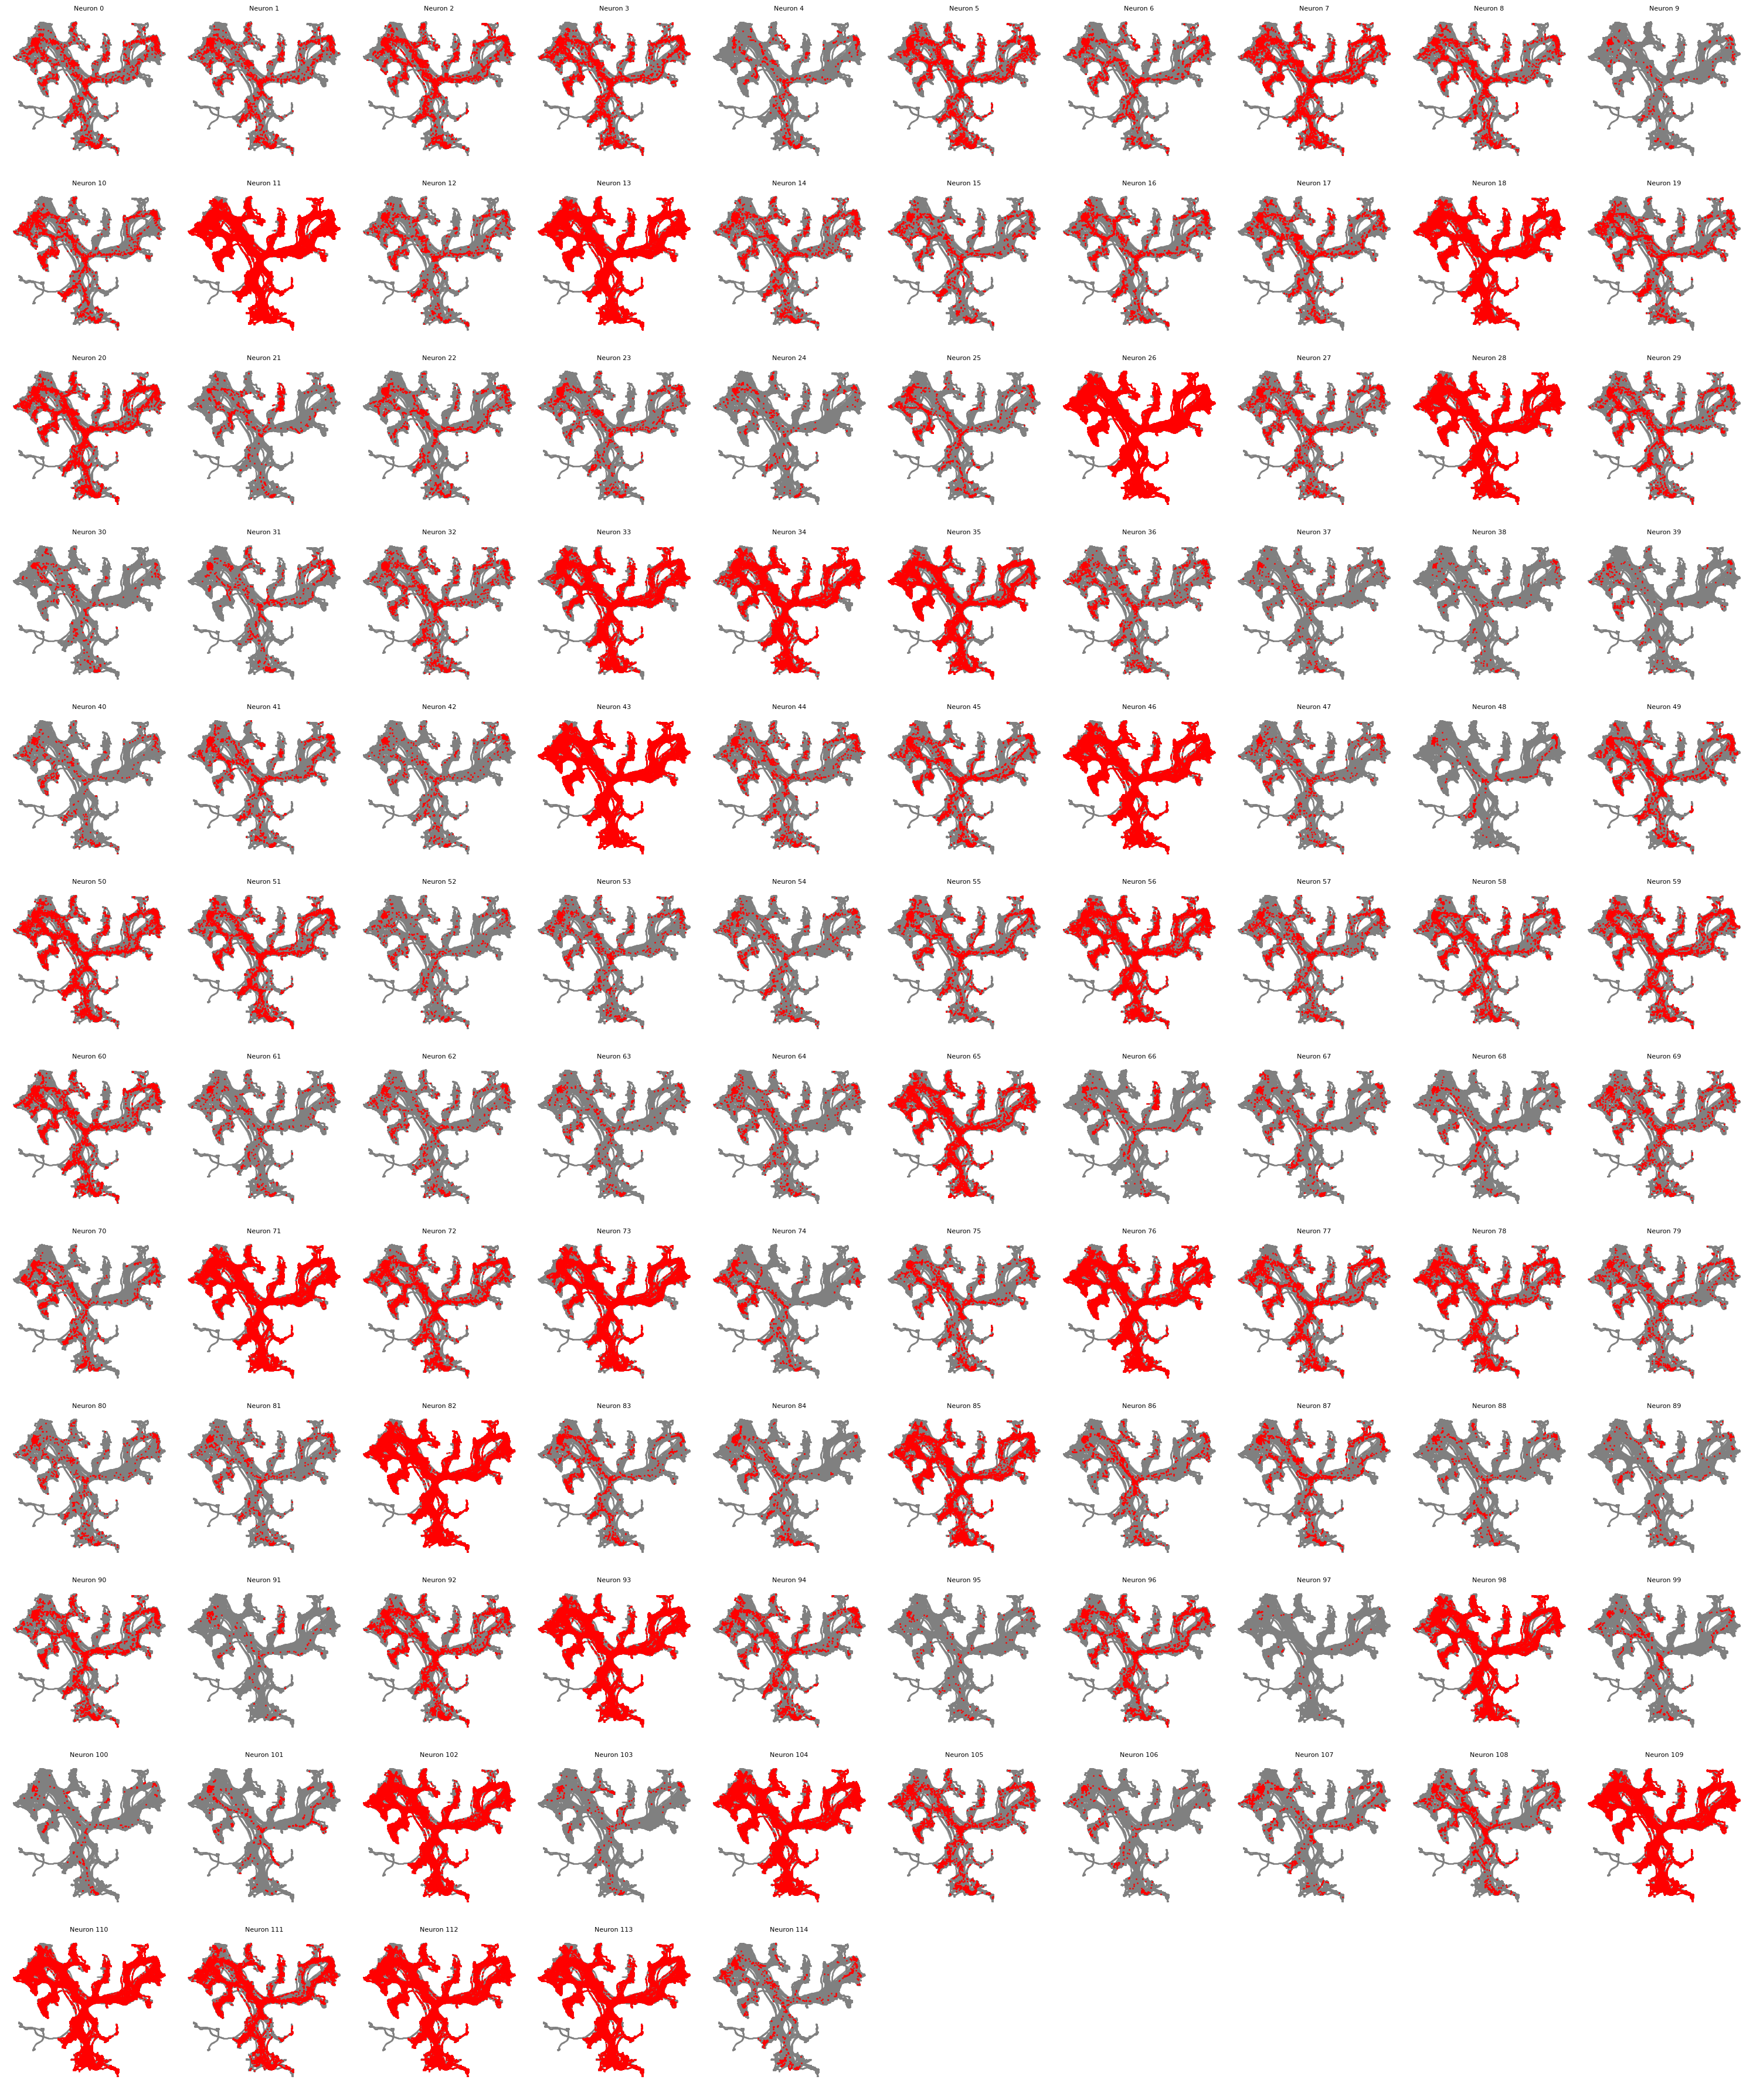

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_time, n_units = spikes.shape

# Set up subplots
n_cols = 10  # number of columns in the grid
n_rows = int(np.ceil(n_units / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows))

# Plot the rat's position when the cell fires for each unit
for i in range(n_units):
    ax = axes.flat[i]
    spike_mask = spikes[:, i].astype(bool)
    pos_spike = positions[spike_mask]

    ax.scatter(positions[:, 0], positions[:, 1], s=1, alpha=0.1, color='gray')
    ax.scatter(pos_spike[:, 0], pos_spike[:, 1], s=1, color='red')
    ax.set_title(f'Unit {i}', fontsize=8)
    ax.set_aspect('equal')
    ax.set_axis_off()

# Turn off any unused subplots
for j in range(n_units, n_rows * n_cols):
    axes.flat[j].axis('off')

plt.tight_layout()
plt.show()

TODO: It would be great to use existing functions to plot spatial coverage etc. Do we need an environment??

In [37]:
# from replay_trajectory_classification import SortedSpikesClassifier

# classifier = SortedSpikesClassifier()
# classifier.fit_place_fields(position=pos_array, spikes=spikes) 


In [38]:
# All of the relevant primary keys we created.

print("Keys for sgs.SpikeSortingRecording")
print(group_keys)
display(sgs.SpikeSortingRecording & group_keys)

print("Keys for sgs.ArtifactDetection")
print(artifact_detection_keys)
display(sgs.ArtifactDetection() & artifact_detection_keys)

print("Keys for sgs.SpikeSorting")
print(spike_sorting_keys)
display(sgs.SpikeSorting() & spike_sorting_keys)

print("Keys for sgs.CurationV1 (initial round of curation)")
print(curation_key_list)
display(sgs.CurationV1() & curation_key_list)

print("Keys for sgs.MetricCurationSelection")
print(metric_curation_keys)
display(sgs.MetricCurationSelection() & metric_curation_keys)

print("Keys for sgs.CurationV1 (after metric curation)")
print(curation_key_list_round2)
display(sgs.CurationV1() & curation_key_list_round2)

print("Keys for SpikeSortingOutput")
print(merge_ids)
display(SpikeSortingOutput() & merge_ids)

print("Key for DecodingOutput.SortedSpikesDecodingV1")
print(selection_key)
display(DecodingOutput.SortedSpikesDecodingV1 & selection_key)

Keys for sgs.SpikeSortingRecording
[{'recording_id': UUID('34ab2436-3685-4fcf-aef5-1b795b00f237')}, {'recording_id': UUID('8ecaf134-7d00-40c4-b2a0-92be69d2a187')}, {'recording_id': UUID('a755fa00-bb57-4a00-8885-b194f2a40600')}, {'recording_id': UUID('d58b7cdc-da75-4547-ade1-171c66739dff')}, {'recording_id': UUID('0867803c-2e78-4ac6-b4e2-6b085ca255ed')}, {'recording_id': UUID('51282a32-32ed-4792-ae0c-88f3418bdf55')}, {'recording_id': UUID('29ad71d5-4fbc-4a4e-8931-9dffe9190a9c')}, {'recording_id': UUID('0d2e1d88-a0a1-4b08-8108-1003a19914e9')}, {'recording_id': UUID('5227a486-5c5a-451b-bd3d-3984fa6d822c')}, {'recording_id': UUID('26067b42-3b2e-49c1-98f8-57a1bb6b23a4')}, {'recording_id': UUID('44d30a68-7fe8-4428-94dc-72232ab66ffe')}, {'recording_id': UUID('b4691cb3-de54-4a8c-8ed3-fe585320a4f5')}, {'recording_id': UUID('57b8bebb-ecb9-4ad3-bc90-16580ffe3d62')}, {'recording_id': UUID('df8d64c4-5241-4021-b0f5-1185d570d2d3')}, {'recording_id': UUID('9e47ae05-cba0-4e77-baa7-27a516d4add1')}, {'re

recording_id,analysis_file_name name of the file,object_id Object ID for the processed recording in NWB file,electrodes_id Object ID for the processed electrodes,hash Hash of the NWB file
0867803c-2e78-4ac6-b4e2-6b085ca255ed,IM-1478_20220726_7JRFV48Z1Z.nwb,7631af76-aee5-43d2-bb17-6ad0de9c3589,1216005c-303d-413c-b83c-048becc338f3,3dba08fb6fc6720ac5fd168411b72eb0
0d2e1d88-a0a1-4b08-8108-1003a19914e9,IM-1478_20220726_0TRJO6BVLG.nwb,4992e6c3-dce4-477a-8bc0-51d2983f226e,ee32fb44-9374-409b-8a32-d0b9d44fc075,d60ed0f27b170309ce11c1996636d726
26067b42-3b2e-49c1-98f8-57a1bb6b23a4,IM-1478_20220726_075WTHHEY7.nwb,24bb4873-88d3-4e82-be3b-5d68aed3c617,0a577a71-20ae-4cc3-9a48-663d3731ca10,bcf72ca13bf2037d5574a140c234f546
29ad71d5-4fbc-4a4e-8931-9dffe9190a9c,IM-1478_20220726_1U9DIBEQCC.nwb,16658107-052d-4f47-baa6-dd17110fe471,ed9deb67-3b29-4f7a-be5f-f741e52e7634,207a3e445669c5811e2d021e5645d855
34ab2436-3685-4fcf-aef5-1b795b00f237,IM-1478_20220726_QEEZ8GSEMP.nwb,56e4ea9b-c2b8-43bd-b4ed-be42f63a72e2,909a1c66-264a-40c4-8511-a867f8e2f41a,4126b8d0a686a5f713fd65368ca8b293
44d30a68-7fe8-4428-94dc-72232ab66ffe,IM-1478_20220726_0MJFRVSV4M.nwb,15b2be77-d5cb-4d5f-9274-628c8a5ea17a,69ae7807-80a9-4e2f-be76-ad331c02fb28,de5d5540c53c8667069d2fd99acf38b7
4b441296-09cb-46f4-893e-269aca33df1b,IM-1478_20220726_6AY9YQ6RFD.nwb,3623ad66-5233-46c1-83a3-82499abc6653,464f32c0-3f54-4f7c-a1ed-3d934c082991,43c69a0c3b00db66d2d39de661de86f2
51282a32-32ed-4792-ae0c-88f3418bdf55,IM-1478_20220726_0LTMS9IPXG.nwb,e5661178-2445-491a-883d-32da6eeeafc9,e2d88e4e-4e76-4c59-a854-53e5587bc29d,215206d201b0786b1f4c2e8dcb5134e5
5227a486-5c5a-451b-bd3d-3984fa6d822c,IM-1478_20220726_F7EMMDP93N.nwb,83bac936-9f6b-4b21-8770-657ea3798db7,854a62b8-8a71-4549-bb4a-958a837389f3,7ab03f6dab09d89cb42864fda85c9a64
558a99a8-321e-49c2-8eaa-2fb7d04c758a,IM-1478_20220726_YHMP5AE2HI.nwb,ecf2747a-42d3-466f-aa6d-13a994d70e14,3dcd4864-f9a2-400b-831e-31b4681ed5e3,09aa2a5dffd0c4f9bee89ad266654a50


Keys for sgs.ArtifactDetection
[{'artifact_id': UUID('a985bb6a-d502-4545-ba6a-6099291b1b8e')}, {'artifact_id': UUID('978a937a-e688-4c15-8398-b6ce8c36a61a')}, {'artifact_id': UUID('39bff494-ab70-47eb-9b79-abdf55127f42')}, {'artifact_id': UUID('e313b290-a965-4f6b-8081-990a8ad81a6a')}, {'artifact_id': UUID('58ce55ea-6471-49ce-a8e4-8e4bbcc2ce77')}, {'artifact_id': UUID('4ec908ac-f242-42d5-9fc8-5b6063028ed1')}, {'artifact_id': UUID('e20e53aa-8b22-417e-a575-302898172607')}, {'artifact_id': UUID('1cb9426e-66a1-49c0-83d5-62ac8fdc9f3c')}, {'artifact_id': UUID('a30fcdc7-2301-488f-92f0-cdb8f7c3aefc')}, {'artifact_id': UUID('f68ac3c4-75ac-4df3-a0e9-d1395b723a52')}, {'artifact_id': UUID('50016ae9-ed50-436f-89d4-c1a4a97e9927')}, {'artifact_id': UUID('698d451d-2b6f-4ad7-a413-d7132e35fe22')}, {'artifact_id': UUID('d20e777a-e5d7-4692-92c3-5fefe59d767e')}, {'artifact_id': UUID('6825da93-dc9e-47a4-ad2b-06c685085885')}, {'artifact_id': UUID('c905af86-a6f6-478e-a36d-68f3cd51d673')}, {'artifact_id': UUID('c

artifact_id
0e848e3d-74d1-4228-bc58-23693b42a787
1cb9426e-66a1-49c0-83d5-62ac8fdc9f3c
39bff494-ab70-47eb-9b79-abdf55127f42
3ee24ae0-f601-45d9-9374-0972dd713d11
4ec908ac-f242-42d5-9fc8-5b6063028ed1
50016ae9-ed50-436f-89d4-c1a4a97e9927
58ce55ea-6471-49ce-a8e4-8e4bbcc2ce77
5af72af4-9ec5-4847-881a-579dd4a89b5d
6825da93-dc9e-47a4-ad2b-06c685085885
698d451d-2b6f-4ad7-a413-d7132e35fe22


Keys for sgs.SpikeSorting
[{'sorting_id': UUID('6e698671-85b9-4fcb-979d-1293e1660a90')}, {'sorting_id': UUID('e2417f7f-b7f4-4698-949f-03582177a710')}, {'sorting_id': UUID('cb94bfc9-13f4-4aee-8d48-f9c7c5b011f4')}, {'sorting_id': UUID('f294456f-c177-42b4-9895-dbcb98757337')}, {'sorting_id': UUID('b7c8c657-05ef-4b15-9a0f-a00218d5163c')}, {'sorting_id': UUID('7617faba-e28c-4846-b04e-3dbdac4f4540')}, {'sorting_id': UUID('40f8ce6b-c9c2-4af4-acaf-da32a4f73b51')}, {'sorting_id': UUID('c9da7594-c6ee-43b4-9a1e-7c9bc21906f4')}, {'sorting_id': UUID('a28382e1-eb6d-4411-95e3-c8c7a6fe2798')}, {'sorting_id': UUID('6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf')}, {'sorting_id': UUID('4a006737-9754-41de-8bf2-fd46caa68ec1')}, {'sorting_id': UUID('bd374141-ba9f-48d0-a83d-282649e94b17')}, {'sorting_id': UUID('81076d23-cdf1-4881-a726-a3d2d44090f6')}, {'sorting_id': UUID('aa35a78e-3f18-4e47-bf62-4bd47ed2f79f')}, {'sorting_id': UUID('4ca04e9c-3352-48e0-8beb-a07281c72a1c')}, {'sorting_id': UUID('b563f306-5d29-4279-8d6

sorting_id,analysis_file_name name of the file,object_id Object ID for the sorting in NWB file,"time_of_sort in Unix time, to the nearest second"
182eb872-395f-4248-97be-d481f08c9154,IM-1478_20220726_XTVSKAFMZD.nwb,9b48fe55-a9a2-49af-bf67-b6ac6d84e400,1762368782
20fa485c-bdbb-456a-9e83-17a9bea8b2df,IM-1478_20220726_6GXAOZUEEA.nwb,159c6b8c-fff6-4ee1-b13c-160491afceff,1762369236
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,IM-1478_20220726_XSRR71LU4H.nwb,455b158d-59ed-40f9-8f0d-7efa5b864e5a,1762369671
38635c94-2bea-493e-998d-4ffd420f070b,IM-1478_20220726_KMV7N6Z25G.nwb,065230b0-defc-47f8-8481-0ea991aca6e1,1762370040
40f8ce6b-c9c2-4af4-acaf-da32a4f73b51,IM-1478_20220726_ZVMYPEUHKJ.nwb,a81c6b21-d8f1-4141-8593-43e922cf1249,1762370462
4a006737-9754-41de-8bf2-fd46caa68ec1,IM-1478_20220726_ETLZ47VD96.nwb,dcc4a4ef-4db0-43ee-b3aa-be033c0c2ece,1762370915
4ca04e9c-3352-48e0-8beb-a07281c72a1c,IM-1478_20220726_3ZEGX135Q7.nwb,350ff84e-0205-4801-bb7d-230bf1ca09cf,1762371322
59ce8c71-5946-4ad6-9824-a78a5492e5b4,IM-1478_20220726_3TLAXQGM6G.nwb,b07894ab-3538-4f8d-9b48-e781303043ff,1762371726
6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf,IM-1478_20220726_99RGFN6JPX.nwb,69d9cb29-a4d6-4cc9-8b23-021e7d575958,1762372064
6e698671-85b9-4fcb-979d-1293e1660a90,IM-1478_20220726_9PML42GLTN.nwb,1d28944d-5ab6-4ab9-a214-2b4ba630c393,1762372377


Keys for sgs.CurationV1 (initial round of curation)
[{'sorting_id': '6e698671-85b9-4fcb-979d-1293e1660a90', 'curation_id': 0}, {'sorting_id': 'e2417f7f-b7f4-4698-949f-03582177a710', 'curation_id': 0}, {'sorting_id': 'cb94bfc9-13f4-4aee-8d48-f9c7c5b011f4', 'curation_id': 0}, {'sorting_id': 'f294456f-c177-42b4-9895-dbcb98757337', 'curation_id': 0}, {'sorting_id': 'b7c8c657-05ef-4b15-9a0f-a00218d5163c', 'curation_id': 0}, {'sorting_id': '7617faba-e28c-4846-b04e-3dbdac4f4540', 'curation_id': 0}, {'sorting_id': '40f8ce6b-c9c2-4af4-acaf-da32a4f73b51', 'curation_id': 0}, {'sorting_id': 'c9da7594-c6ee-43b4-9a1e-7c9bc21906f4', 'curation_id': 0}, {'sorting_id': 'a28382e1-eb6d-4411-95e3-c8c7a6fe2798', 'curation_id': 0}, {'sorting_id': '6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf', 'curation_id': 0}, {'sorting_id': '4a006737-9754-41de-8bf2-fd46caa68ec1', 'curation_id': 0}, {'sorting_id': 'bd374141-ba9f-48d0-a83d-282649e94b17', 'curation_id': 0}, {'sorting_id': '81076d23-cdf1-4881-a726-a3d2d44090f6', 'cur

sorting_id,curation_id,parent_curation_id,analysis_file_name name of the file,object_id,merges_applied,description
182eb872-395f-4248-97be-d481f08c9154,0,-1,IM-1478_20220726_CAC88V34XP.nwb,36bbc865-b980-41b1-8003-23e3b3e25379,0,initial automatic curation
20fa485c-bdbb-456a-9e83-17a9bea8b2df,0,-1,IM-1478_20220726_2LQZTIRXZT.nwb,aadc3255-3b43-4dfe-afbf-7409479f90ad,0,initial automatic curation
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,0,-1,IM-1478_20220726_CX7QVUQ6AQ.nwb,1388a9b6-a219-450f-a9fc-99623551683f,0,initial automatic curation
38635c94-2bea-493e-998d-4ffd420f070b,0,-1,IM-1478_20220726_EFAK43PR86.nwb,77be9e52-3d8d-47e4-a61d-1859b37fbfe9,0,initial automatic curation
40f8ce6b-c9c2-4af4-acaf-da32a4f73b51,0,-1,IM-1478_20220726_URF84UP1Z3.nwb,3e33ecce-864d-4e11-b80e-1cbfdf16a5dd,0,initial automatic curation
4a006737-9754-41de-8bf2-fd46caa68ec1,0,-1,IM-1478_20220726_BXR60B8RGD.nwb,a782861e-2518-4b72-af21-11e980669e1b,0,initial automatic curation
4ca04e9c-3352-48e0-8beb-a07281c72a1c,0,-1,IM-1478_20220726_ZOV7ONADXC.nwb,75872930-0ddd-4079-9e29-4f40d9945041,0,initial automatic curation
59ce8c71-5946-4ad6-9824-a78a5492e5b4,0,-1,IM-1478_20220726_L3D59AGCKD.nwb,bd1e9737-5fe7-4adf-8570-384d2f98c580,0,initial automatic curation
6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf,0,-1,IM-1478_20220726_5SL3NNB18D.nwb,8391a8ba-30f9-45c3-a712-0e215f6bd169,0,initial automatic curation
6e698671-85b9-4fcb-979d-1293e1660a90,0,-1,IM-1478_20220726_8Q2W3IUCY1.nwb,ac0ad6da-c80e-4bbb-b635-12a8e8252f75,0,initial automatic curation


Keys for sgs.MetricCurationSelection
[{'metric_curation_id': UUID('365aca94-d081-4385-82f8-dc1db4073612')}, {'metric_curation_id': UUID('45fd0383-065b-4b9f-9538-b5fb455ce613')}, {'metric_curation_id': UUID('589b8185-59e2-4708-b71f-dd23a206f758')}, {'metric_curation_id': UUID('36ae9a61-8f94-4047-86b2-2aae9ece2453')}, {'metric_curation_id': UUID('22c897d8-0ad8-427a-9729-48149b22e918')}, {'metric_curation_id': UUID('2ee3c57f-055b-4d79-be10-d16de8eddafe')}, {'metric_curation_id': UUID('3c12ea06-d1df-45b5-bc2f-c442e69b9c0a')}, {'metric_curation_id': UUID('1d638c7f-65c8-4560-90b9-27d423148b52')}, {'metric_curation_id': UUID('0eaaadfd-5e07-45cd-9d46-238bca751b54')}, {'metric_curation_id': UUID('5c7d14ae-1bd4-47b0-bc32-3361111ccee6')}, {'metric_curation_id': UUID('9ba33175-8984-481a-893d-5147ba3448fd')}, {'metric_curation_id': UUID('c087d1c1-b6d9-467b-8524-b6e67ca34087')}, {'metric_curation_id': UUID('d75a1dc7-b906-42c9-933c-b1a7d5a46f9e')}, {'metric_curation_id': UUID('2b139787-a9f5-4bb3-8b7a

metric_curation_id,sorting_id,curation_id,waveform_param_name name of waveform extraction parameters,metric_param_name,metric_curation_param_name
0bc55909-59fd-405a-8a94-b41d94a27804,373f4eb7-9411-41bf-ad85-16bbaccb3dfa,0,default_not_whitened,franklab_default,default
0eaaadfd-5e07-45cd-9d46-238bca751b54,a28382e1-eb6d-4411-95e3-c8c7a6fe2798,0,default_not_whitened,franklab_default,default
1d638c7f-65c8-4560-90b9-27d423148b52,c9da7594-c6ee-43b4-9a1e-7c9bc21906f4,0,default_not_whitened,franklab_default,default
227aa0f6-46c3-4a8c-85a6-b8245306ff70,a12af572-ee69-4dac-ae34-ec7252e2a92d,0,default_not_whitened,franklab_default,default
22c897d8-0ad8-427a-9729-48149b22e918,b7c8c657-05ef-4b15-9a0f-a00218d5163c,0,default_not_whitened,franklab_default,default
2908fb7b-ced5-4450-ac94-b86d79b8f700,b563f306-5d29-4279-8d6e-c97cbcc407e0,0,default_not_whitened,franklab_default,default
2b139787-a9f5-4bb3-8b7a-b60504a4f2f2,aa35a78e-3f18-4e47-bf62-4bd47ed2f79f,0,default_not_whitened,franklab_default,default
2ee3c57f-055b-4d79-be10-d16de8eddafe,7617faba-e28c-4846-b04e-3dbdac4f4540,0,default_not_whitened,franklab_default,default
365aca94-d081-4385-82f8-dc1db4073612,6e698671-85b9-4fcb-979d-1293e1660a90,0,default_not_whitened,franklab_default,default
36ae9a61-8f94-4047-86b2-2aae9ece2453,f294456f-c177-42b4-9895-dbcb98757337,0,default_not_whitened,franklab_default,default


Keys for sgs.CurationV1 (after metric curation)
[{'sorting_id': '6e698671-85b9-4fcb-979d-1293e1660a90', 'curation_id': 1}, {'sorting_id': 'e2417f7f-b7f4-4698-949f-03582177a710', 'curation_id': 1}, {'sorting_id': 'cb94bfc9-13f4-4aee-8d48-f9c7c5b011f4', 'curation_id': 1}, {'sorting_id': 'f294456f-c177-42b4-9895-dbcb98757337', 'curation_id': 1}, {'sorting_id': 'b7c8c657-05ef-4b15-9a0f-a00218d5163c', 'curation_id': 1}, {'sorting_id': '7617faba-e28c-4846-b04e-3dbdac4f4540', 'curation_id': 1}, {'sorting_id': '40f8ce6b-c9c2-4af4-acaf-da32a4f73b51', 'curation_id': 1}, {'sorting_id': 'c9da7594-c6ee-43b4-9a1e-7c9bc21906f4', 'curation_id': 1}, {'sorting_id': 'a28382e1-eb6d-4411-95e3-c8c7a6fe2798', 'curation_id': 1}, {'sorting_id': '6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf', 'curation_id': 1}, {'sorting_id': '4a006737-9754-41de-8bf2-fd46caa68ec1', 'curation_id': 1}, {'sorting_id': 'bd374141-ba9f-48d0-a83d-282649e94b17', 'curation_id': 1}, {'sorting_id': '81076d23-cdf1-4881-a726-a3d2d44090f6', 'curatio

sorting_id,curation_id,parent_curation_id,analysis_file_name name of the file,object_id,merges_applied,description
182eb872-395f-4248-97be-d481f08c9154,1,0,IM-1478_20220726_71D1S0VFBB.nwb,1a686739-cdee-4521-bca9-70913e0bf917,0,after metric curation
20fa485c-bdbb-456a-9e83-17a9bea8b2df,1,0,IM-1478_20220726_DP739VRJ5T.nwb,c04edfdd-9f5d-4a35-add4-3a86ab39f8f8,0,after metric curation
373f4eb7-9411-41bf-ad85-16bbaccb3dfa,1,0,IM-1478_20220726_DVHTTNXJWV.nwb,30dface5-6a99-4f39-a2ba-ec01e0adf8a7,0,after metric curation
38635c94-2bea-493e-998d-4ffd420f070b,1,0,IM-1478_20220726_8OJINLDXEP.nwb,7d312a20-857b-454c-8db6-81d286c2cf73,0,after metric curation
40f8ce6b-c9c2-4af4-acaf-da32a4f73b51,1,0,IM-1478_20220726_NJKKUXXKTV.nwb,3171ce37-9986-41c0-90fc-210288271c4a,0,after metric curation
4a006737-9754-41de-8bf2-fd46caa68ec1,1,0,IM-1478_20220726_6ZVSC0FHRP.nwb,583e40c2-c60d-4b7d-b71a-f97d7f3573c5,0,after metric curation
4ca04e9c-3352-48e0-8beb-a07281c72a1c,1,0,IM-1478_20220726_5CBWNDCH4U.nwb,082e4736-3bb9-4fff-b571-b67f5eecafdc,0,after metric curation
59ce8c71-5946-4ad6-9824-a78a5492e5b4,1,0,IM-1478_20220726_PNY6XK301N.nwb,cc08f2b0-ee12-4a59-b1df-80e9168e3f40,0,after metric curation
6cebac9b-f53b-461f-b2c3-4bf33c6cfbcf,1,0,IM-1478_20220726_JHTAUUSMDP.nwb,bda660f2-eee8-4259-8236-482f3dc6b83b,0,after metric curation
6e698671-85b9-4fcb-979d-1293e1660a90,1,0,IM-1478_20220726_3QV0TZXZNF.nwb,5ff48932-b258-4fee-97d1-372cbf5b9b63,0,after metric curation


Keys for SpikeSortingOutput
[{'merge_id': UUID('9e4b473e-09e9-1524-6208-db4e04999443')}, {'merge_id': UUID('8aa0c1a8-17c4-3c63-8bc4-fb19c5a7bbe6')}, {'merge_id': UUID('fa2b5a4c-1c88-c389-c900-9f1c25166a2c')}, {'merge_id': UUID('1078ff7b-4a11-b3d6-b81f-12b41d41d52b')}, {'merge_id': UUID('6f16b01b-9b0d-b80a-93be-ea315cf07484')}, {'merge_id': UUID('f9ddd06e-b220-46ed-0cad-be03c11f31f7')}, {'merge_id': UUID('3a316ee5-54ef-d4d9-3872-52dda62c1915')}, {'merge_id': UUID('1bc939bc-9189-f91a-1337-528b46d6356b')}, {'merge_id': UUID('f757ca5a-d593-83de-ebcf-d50906a07b93')}, {'merge_id': UUID('d0fb9b11-b7f6-4394-454c-1dfd80e994b7')}, {'merge_id': UUID('09360af7-7244-7cd4-466c-ff290366318c')}, {'merge_id': UUID('0e99a76b-31bf-aa50-55cf-55193998dad6')}, {'merge_id': UUID('4633a287-c7b4-ae6f-5f58-36e18d6f85a3')}, {'merge_id': UUID('593c4557-9b78-60d7-795a-de3d009156fb')}, {'merge_id': UUID('489014ae-90bc-fcec-007d-8ba4003e15c3')}, {'merge_id': UUID('5f0aad41-93f9-a1c1-5716-6bfa69562121')}, {'merge_id'

merge_id,source
06f09f86-93b3-1f74-bc32-31edf2e3b863,CurationV1
09360af7-7244-7cd4-466c-ff290366318c,CurationV1
0e99a76b-31bf-aa50-55cf-55193998dad6,CurationV1
1078ff7b-4a11-b3d6-b81f-12b41d41d52b,CurationV1
1bc939bc-9189-f91a-1337-528b46d6356b,CurationV1
2f8f8149-cd9d-56a8-3bd4-54662980c0c5,CurationV1
3a316ee5-54ef-d4d9-3872-52dda62c1915,CurationV1
4633a287-c7b4-ae6f-5f58-36e18d6f85a3,CurationV1
489014ae-90bc-fcec-007d-8ba4003e15c3,CurationV1
593c4557-9b78-60d7-795a-de3d009156fb,CurationV1


Key for DecodingOutput.SortedSpikesDecodingV1
{'sorted_spikes_group_name': 'sorted_spikes_group', 'unit_filter_params_name': 'default_exclusion', 'position_group_name': 'sorted_spikes_pos_group', 'decoding_param_name': 'contfrag_sorted', 'nwb_file_name': 'IM-1478_20220726_.nwb', 'encoding_interval': '00_r1', 'decoding_interval': 'epoch0_block1', 'estimate_decoding_params': False}


merge_id,nwb_file_name name of the NWB file,unit_filter_params_name,sorted_spikes_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters
fb231218-5693-1d21-6fcd-74d35ea7eefe,IM-1478_20220726_.nwb,default_exclusion,sorted_spikes_group,sorted_spikes_pos_group,contfrag_sorted,00_r1,epoch0_block1,0
